# Main figures as presented in the body the WP1 report (211006)

Authors: [Martin Röck](https://www.linkedin.com/in/martinroeck/) and [Andreas Sørensen](https://www.linkedin.com/in/a-soerensen) - Source: https://doi.org/10.5281/zenodo.5895051

# Setup and data import

## Import modules

In [120]:
# SETUP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
import time

In [121]:
print("Analysing data and generating figures...")

Analysing data and generating figures...


## Define functions

In [122]:
# Initiate percentile functions:
def percentile25(g):
    return np.percentile(g, 25)
def percentile75(g):
    return np.percentile(g, 75)

In [123]:
# Initiate heatmap function:
# Original syntax
'''sns.heatmap(cross, cmap='rocket_r' #_pal
            , annot=True, fmt='g')'''

#Function
def plot_heatmap(cross_table, fmt='g'):
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.heatmap(cross_table
                ,annot=True
                ,fmt=fmt
                ,cmap='rocket_r' #'rocket_r' 'YlGnBu'
                ,linewidths=1
                ,ax=ax)
    return fig, ax
    #plt.show();

In [124]:
# set data frame printing to unlimited rows and columns
#pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore') #gets rid of the 'red' warnings

#Set seaborn colour palette
#Ramboll blue (standard)
colors2 = ["#05326E", "#009DF0","#BDD9AA","#99D8F9","#E9EBEC","#D4D7D9","#6984A8","#66C4F6"]
#Ramboll blue (custom)
colors = ["#009DF0", "#004E78","#0076B4","#5DC7FF","#93DAFF","#C9ECFF","#CCDAE1","#99B4C4"]
#Ramboll primary (standard)
#colors = ["", "","","","","","",""]
#Ramboll primary (pastel)
#colors = ["", "","","","","","",""]

sns.set_palette(sns.color_palette(colors))

#Set figure sizes
w_1 = 3
f_1 = 0.75
#f_1 = 1
#f_1 = 1.25

w_2 = 6
f_2 = 0.6180 # Golden ratio :D
#f_2 = 0.8
#f_2 = 1.0

f_3 = 0.5
#f_3 = 0.75
#f_3 = 1.0

f_4 = 1-0.6180
#f_4 = 0.75
#f_4 = 1.0


In [125]:
# set visualisation style

style_dict = {
    'axes.grid': True
}

sns.set_style(style = "ticks", rc = style_dict)
sns.set_context("paper")

## Import Data

**Import data from "Data_FeatEng" csv to pandas dataframe**

In [126]:
# IMPORT DATA FROM DATA_FEATENG CSV-FILE

filename = '00_data/3_data_feature_engineered/EU-ECB_dataset_feature_engineered.csv'
df = pd.read_csv(filename, delimiter = ',')
df_backup = df

# Feature engineering

## Calculate life cycle totals

Recalculate values over [50 years] RSP, as oposed to 'per year' values.

In [127]:
# Calculate LC sums based on RSP_harm

# Harmonoized reference study period (RSP)
RSP_harm = 50

# Instantiate new features
df['GHG_sum_em_m2'] = 1.0
df['GHG_sum_em_m2_harm'] = 1.0

df['GHG_A123_m2'] = 1.0
df['GHG_A123_m2_harm'] = 1.0

df['GHG_A45_m2'] = 1.0
df['GHG_A45_m2_harm'] = 1.0

df['GHG_B1234_m2'] = 1.0
df['GHG_B1234_m2_harm'] = 1.0

df['GHG_B5_m2'] = 1.0
df['GHG_B5_m2_harm'] = 1.0

df['GHG_C12_m2'] = 1.0
df['GHG_C12_m2_harm'] = 1.0

df['GHG_C34_m2'] = 1.0
df['GHG_C34_m2_harm'] = 1.0

df["C_total"] = 0.1
df["EC_shareX"] = 0.1
df["OC_shareX"] = 0.1

df['GHG_B67_m2'] = 0.1
df['GHG_B67_m2'] = 0.1

df['GHG_sum_em_capita_harm'] = 0.1


# Calculate feature values
## Embodied carbon (A/B/C)
df['GHG_sum_em_m2'] = df['GHG_sum_em_m2a'] * RSP_harm
df['GHG_sum_em_m2_harm'] = df['GHG_sum_em_m2a_harm'] * RSP_harm

df['GHG_A123_m2'] = df['GHG_A123_m2a'] * RSP_harm
df['GHG_A123_m2_harm'] = df['GHG_A123_m2a_harm'] * RSP_harm

df['GHG_A45_m2'] = df['GHG_A45_m2a'] * RSP_harm
df['GHG_A45_m2_harm'] = df['GHG_A45_m2a_harm'] * RSP_harm

df['GHG_B1234_m2'] = df['GHG_B1234_m2a'] * RSP_harm
df['GHG_B1234_m2_harm'] = df['GHG_B1234_m2a'] * RSP_harm

df['GHG_B5_m2'] = df['GHG_B5_m2a'] * RSP_harm
df['GHG_B5_m2_harm'] = df['GHG_B5_m2a_harm'] * RSP_harm

df['GHG_C12_m2'] = df['GHG_C12_m2a'] * RSP_harm
df['GHG_C12_m2_harm'] = df['GHG_C12_m2a_harm'] * RSP_harm

df['GHG_C34_m2'] = df['GHG_C34_m2a'] * RSP_harm
df['GHG_C34_m2_harm'] = df['GHG_C34_m2a_harm'] * RSP_harm

## Operational carbon (B67)
df['GHG_B67_m2'] = df['GHG_B67_m2a'] * RSP_harm
df['GHG_B67_m2_harm'] = df['GHG_B67_m2a_harm'] * RSP_harm

## Total & shares
df["C_total"] = df['GHG_sum_em_m2_harm'] + df['GHG_B67_m2_harm']
df["EC_shareX"] = df['GHG_sum_em_m2_harm'] / df["C_total"]
df["OC_shareX"] = df['GHG_B67_m2_harm'] / df["C_total"]

## Per capita LC sums
df['GHG_sum_em_capita_harm'] = df['GHG_sum_em_m2_harm'] * df['bldg_area_gfa'] / df['bldg_users_total']

## Data subsets

**Main subsets with data from the 5 benchmark countries DK, BE, FI, NL and FR**
<br> Also filtered such that only data from the following data partners are included:
<br>BUILD, Ramboll, KU Leuven, Bionova, Granlund, NIBE and CSTB.

In [128]:
# Sub-sets
df_DK = df[df.site_country.isin(['Denmark']) & df.admin_project_contact.isin(['BUILD', 'Ramboll'])]
df_FR = df[df.site_country.isin(['France']) & df.admin_project_contact.isin(['CSTB'])]
df_BE = df[df.site_country.isin(['Belgium']) & df.admin_project_contact.isin(['KU Leuven'])]
df_NL = df[df.site_country.isin(['Netherlands']) & df.admin_project_contact.isin(['NIBE'])]
df_FI = df[df.site_country.isin(['Finland']) & df.admin_project_contact.isin(['Granlund Oy', 'Bionova'])]

df_UK = df[df.site_country.isin(['United Kingdom']) & df.admin_data_partner.isin(['Mirko Farnetani - HM'])]
df_AT = df[df.site_country.isin(['Austria']) & df.admin_data_partner.isin(['PORR'])]
df_DE = df[df.site_country.isin(['Germany']) & df.admin_data_partner.isin(['PORR'])]
df_CH = df[df.site_country.isin(['Switzerland']) & df.admin_data_partner.isin(['PORR'])]

df_EUECB = df_DK.append([df_FR, df_BE, df_NL, df_FI])

df_EUECB.shape

(769, 242)

In [129]:
df_EUECB.shape

(769, 242)

In [130]:
df_DK.shape

(72, 242)

In [131]:
df_FR.shape

(486, 242)

In [132]:
df_BE.shape

(105, 242)

In [133]:
df_NL.shape

(47, 242)

In [134]:
df_FI.shape

(59, 242)

**APEN data subset**
<br>This subset is used to create tables and figures of historical embodied carbon.

In [135]:
#Filter by admin data partner
df_APEN = df[df.admin_data_partner.isin(['ROECK-et-al', 'AMIRI-et-al'])]

## Parameter definition

In [136]:
# Define data (sub)set and name
_df = df_EUECB #Other: df_FR, df_BE
_df_name = 'EU-ECB' 

_Y = 'GHG_sum_em_m2_harm'

df=_df

In [137]:
df[_Y].describe()

count     744.000000
mean      591.050499
std       191.932453
min       106.879673
25%       504.997075
50%       583.832602
75%       655.894904
max      1799.718510
Name: GHG_sum_em_m2_harm, dtype: float64

# On the fly statistics computation

In [138]:
stats = ['count','mean',np.std,'min',percentile25,'median',percentile75,'max']

# Create tables
pivot_table = pd.pivot_table(df_EUECB,
                             values = 'GHG_sum_em_m2',
                             index = 'site_country_code',
                             columns = 'bldg_use_type',
                             aggfunc = stats,
                             margins=True,
                             margins_name='EU-ECB').T
pivot_table

BE          DK          FI           FR  \
             bldg_use_type                                                      
count        Non-residential         NaN   34.000000   31.000000    28.000000   
             Residential      105.000000   38.000000   28.000000   434.000000   
             EU-ECB           105.000000   72.000000   59.000000   462.000000   
mean         Non-residential         NaN  333.843958  532.431494  1170.035915   
             Residential      527.891995  344.900436  456.720687   633.573743   
             EU-ECB           527.891995  339.679321  496.500941   666.086602   
std          Non-residential         NaN   93.223408   93.929318   477.042320   
             Residential      137.852634   88.745274  105.924522   116.954519   
             EU-ECB           137.852634   90.412617  106.021459   206.388718   
min          Non-residential         NaN  106.879673  414.990000   542.825831   
             Residential      320.071568  164.216568  315.000000   413.000944   
             EU-ECB           320.071568  106.879673  315.000000   413.000944   
percentile25 Non-residential         NaN  280.125000  443.875000          NaN   
             Residential      468.750274  269.125000  402.178756          NaN   
             EU-ECB           468.750274  274.750000  417.541000          NaN   
median       Non-residential         NaN  332.250000  524.500000  1006.379176   
             Residential      512.330308  339.500000  418.850889   609.548197   
             EU-ECB           512.330308  333.000000  477.000000   615.202772   
percentile75 Non-residential         NaN  393.250000  591.489250          NaN   
             Residential      598.401645  411.125000  491.250000          NaN   
             EU-ECB           598.401645  403.375000  572.000000          NaN   
max          Non-residential         NaN  493.500000  810.000000  3017.443282   
             Residential      863.418698  542.500000  744.250698  1726.664649   
             EU-ECB           863.418698  542.500000  810.000000  3017.443282   

                                       NL       EU-ECB  
             bldg_use_type                              
count        Non-residential    18.000000   111.000000  
             Residential        29.000000   634.000000  
             EU-ECB             47.000000   745.000000  
mean         Non-residential   397.071134   610.489702  
             Residential       257.128451   573.739408  
             EU-ECB            310.723521   579.214955  
std          Non-residential   167.122952   421.556518  
             Residential        62.492564   157.275705  
             EU-ECB            132.013442   217.778079  
min          Non-residential   250.805743   106.879673  
             Residential       167.004246   164.216568  
             EU-ECB            167.004246   106.879673  
percentile25 Non-residential   330.006211   343.910125  
             Residential       205.706004   509.010097  
             EU-ECB            229.561204   479.595583  
median       Non-residential   358.044921   465.000000  
             Residential       249.966667   583.652940  
             EU-ECB            297.250484   576.865035  
percentile75 Non-residential   398.000027   754.207282  
             Residential       297.250484   652.263683  
             EU-ECB            358.044921   652.940248  
max          Non-residential  1008.735294  3017.443282  
             Residential       384.063492  1726.664649  
             EU-ECB           1008.735294  3017.443282

# Baseline for different types of building use (3.2)

## Embodied carbon per m²

**Boxplot of "GHG sum em m2 harm" vs "building use type" for each country in EU-ECB**

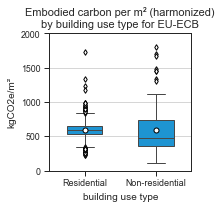

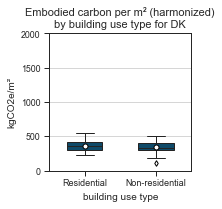

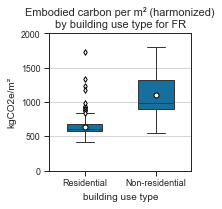

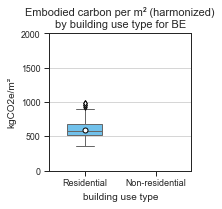

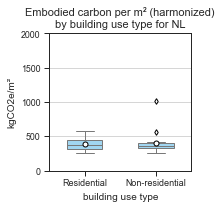

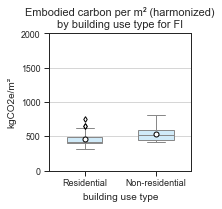

In [139]:
# choose subsets to visualize
list_df = [df_EUECB,df_DK,df_FR,df_BE,df_NL,df_FI]

# and their titles
list_title = ['EU-ECB','DK','FR', 'BE','NL','FI']

#Choose features on x-axis
_X_list = ['bldg_use_type']
#and their titles
_X_list_titles = ['building use type']

#Choose value on y-axis
_Y_list = ['GHG_sum_em_m2_harm']

#and its labels
_Y_list_label1 = [u'Embodied carbon per m² (harmonized)']
_Y_list_label2 = [u'kgCO2e/m²']

for i in range(0,len(_X_list)):
    for y in range(0,len(_Y_list)):
        for j in range(0,len(list_df)):
        
            _X = _X_list[i]
            _Y = _Y_list[y]

            # set figure size
            w = w_1
            h = w*f_1
            fig, ax = plt.subplots(figsize = (w,h))

            # create boxplot
            sns.boxplot(data = list_df[j],
                        x=_X,
                        y=_Y,
                        orient = 'v',
                        color = sns.color_palette(colors)[j],
                        order=['Residential','Non-residential'],
                        width=0.5,
                        fliersize=4,
                        linewidth=1,
                        showmeans=True,
                        meanprops={"marker":"o",
                                   "markerfacecolor":"white",
                                   "markeredgecolor":"black",
                                   "markersize":"5"},
                        flierprops={"markerfacecolor":"white",
                                   "markeredgecolor":"black"}
                        )

            # set plot title
            boxplot_title = str(_Y_list_label1[y]) + "\n" + 'by ' + _X_list_titles[i] + ' for ' + list_title[j]
            boxplot_file_name = str(_Y_list_label1[y]) + ' by ' + _X_list_titles[i] + ' for ' + list_title[j]
            plt.title(boxplot_title, fontsize = 11)

            # set axis labels
            plt.xlabel(_X_list_titles[i], fontsize = 10, labelpad = 5)
            plt.ylabel(_Y_list_label2[y], fontsize = 10, labelpad = 5)

            # adjust y-axis
            plt.ylim([0,2000])
            plt.xticks(rotation=0,fontsize = 9)

            timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
            
            plt.tight_layout()
            fig.savefig('01_figures/0_boxplots/boxplot_'+boxplot_file_name+'_'+timestr+'.png', dpi = 600, bbox_inches="tight")
            fig.savefig('01_figures/0_boxplots/boxplot_'+boxplot_file_name+'_'+timestr+'.svg', format = 'svg', bbox_inches="tight")
            plt.show()

**Boxplot of "GHG sum em m2a" vs "building use type" for each country in EU-ECB**

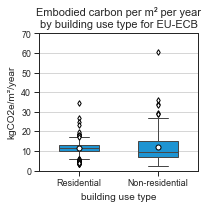

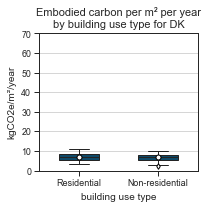

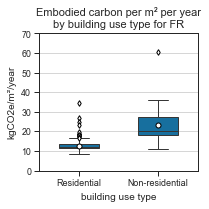

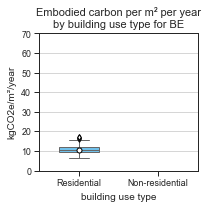

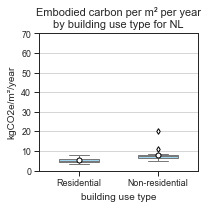

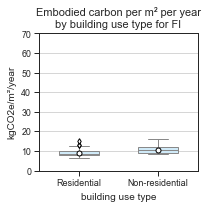

In [140]:
# choose subsets to visualize
list_df = [df_EUECB,df_DK,df_FR,df_BE,df_NL,df_FI]

# and their titles
list_title = ['EU-ECB','DK','FR', 'BE','NL','FI']

#Choose features on x-axis
_X_list = ['bldg_use_type']
#and their titles
_X_list_titles = ['building use type']

#Choose value on y-axis
_Y_list = ['GHG_sum_em_m2a']

#and its labels
_Y_list_label1 = [u'Embodied carbon per m² per year']
_Y_list_label2 = [u'kgCO2e/m²/year']

for i in range(0,len(_X_list)):
    for y in range(0,len(_Y_list)):
        for j in range(0,len(list_df)):
        
            _X = _X_list[i]
            _Y = _Y_list[y]

            # set figure size
            w = w_1
            h = w*f_1
            fig, ax = plt.subplots(figsize = (w,h))

            # create boxplot
            sns.boxplot(data = list_df[j],
                        x=_X,
                        y=_Y,
                        orient = 'v',
                        color = sns.color_palette(colors)[j],
                        order=['Residential','Non-residential'],
                        width=0.5,
                        fliersize=4,
                        linewidth=1,
                        showmeans=True,
                        meanprops={"marker":"o",
                                   "markerfacecolor":"white",
                                   "markeredgecolor":"black",
                                   "markersize":"5"},
                        flierprops={"markerfacecolor":"white",
                                   "markeredgecolor":"black"}
                        )

            # set plot title
            boxplot_title = str(_Y_list_label1[y]) + "\n" + 'by ' + _X_list_titles[i] + ' for ' + list_title[j]
            boxplot_file_name = str(_Y_list_label1[y]) + ' by ' + _X_list_titles[i] + ' for ' + list_title[j]
            plt.title(boxplot_title, fontsize = 11)

            # set axis labels
            plt.xlabel(_X_list_titles[i], fontsize = 10, labelpad = 5)
            plt.ylabel(_Y_list_label2[y], fontsize = 10, labelpad = 5)

            # adjust y-axis
            plt.ylim([0,70])
            plt.xticks(rotation=0,fontsize = 9)

            timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
            
            plt.tight_layout()
            fig.savefig('01_figures/0_boxplots/boxplot_'+boxplot_file_name+'_'+timestr+'.png', dpi = 600, bbox_inches="tight")
            fig.savefig('01_figures/0_boxplots/boxplot_'+boxplot_file_name+'_'+timestr+'.svg', format = 'svg', bbox_inches="tight")
            plt.show()

**Boxplot of "GHG sum em m2a harm" vs "building use subtype" for each country in EU-ECB**

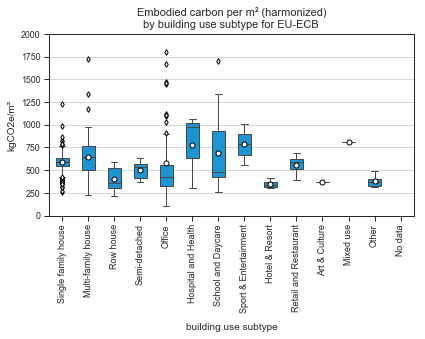

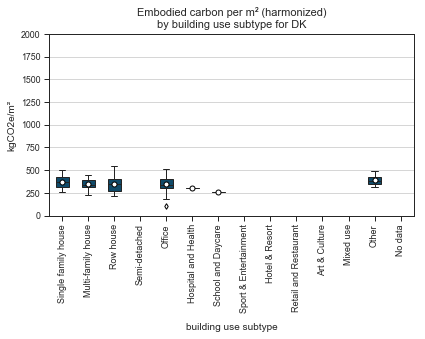

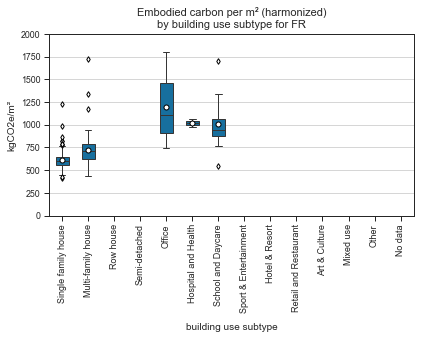

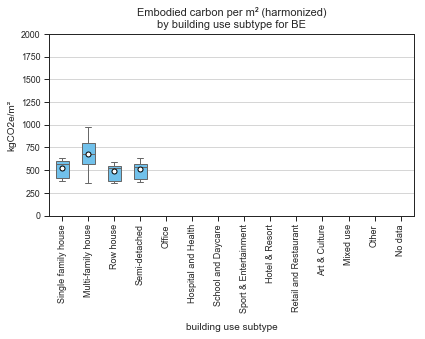

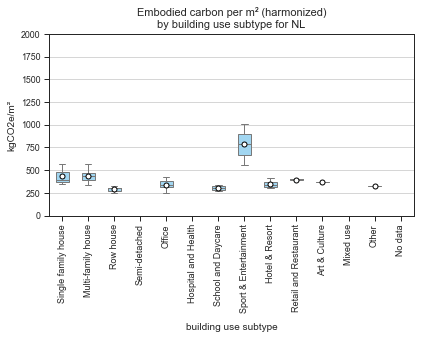

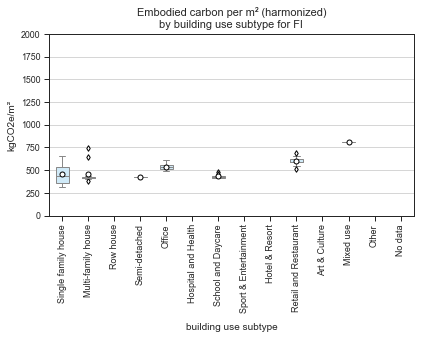

In [141]:
# choose subsets to visualize
list_df = [df_EUECB,df_DK,df_FR,df_BE,df_NL,df_FI]
# and their titles
list_title = ['EU-ECB','DK','FR', 'BE','NL','FI']

#Choose features on x-axis
_X_list = ['bldg_use_subtype']
#and their titles
_X_list_titles = ['building use subtype']

#Choose value on y-axis
_Y_list = ['GHG_sum_em_m2_harm']

#and its labels
_Y_list_label1 = [u'Embodied carbon per m² (harmonized)']
_Y_list_label2 = [u'kgCO2e/m²']

for i in range(0,len(_X_list)):
    for y in range(0,len(_Y_list)):
        for j in range(0,len(list_df)):
        
            _X = _X_list[i]
            _Y = _Y_list[y]
            
            # set figure size
            w = w_2
            h = w*f_2
            fig, ax = plt.subplots(figsize = (w,h))

            # create boxplot
            sns.boxplot(data = list_df[j],
                        x=_X,
                        y=_Y,
                        orient = 'v',
                        color = sns.color_palette(colors)[j],
                        order=['Single family house','Multi-family house','Row house','Semi-detached','Office','Hospital and Health','School and Daycare','Sport & Entertainment','Hotel & Resort','Retail and Restaurant','Art & Culture','Mixed use','Other','No data'],
                        width=0.5,
                        fliersize=4,
                        linewidth=1,
                        showmeans=True,
                        meanprops={"marker":"o",
                                   "markerfacecolor":"white",
                                   "markeredgecolor":"black",
                                   "markersize":"5"},
                        flierprops={"markerfacecolor":"white",
                                   "markeredgecolor":"black"}
                        )

            # set plot title
            boxplot_title = str(_Y_list_label1[y]) + "\n" + 'by ' + _X_list_titles[i] + ' for ' + list_title[j]
            boxplot_file_name = str(_Y_list_label1[y]) + ' by ' + _X_list_titles[i] + ' for ' + list_title[j]
            plt.title(boxplot_title, fontsize = 11)

            # set axis labels
            plt.xlabel(_X_list_titles[i], fontsize = 10, labelpad = 10)
            plt.ylabel(_Y_list_label2[y], fontsize = 10, labelpad = 5)

            # adjust y-axis
            plt.ylim([0,2000])
            plt.xticks(rotation=90,fontsize = 9)

            timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
            
            plt.tight_layout()
            fig.savefig('01_figures/0_boxplots/boxplot_'+boxplot_file_name+'_'+timestr+'.png', dpi = 600)
            fig.savefig('01_figures/0_boxplots/boxplot_'+boxplot_file_name+'_'+timestr+'.svg', format = 'svg')
            plt.show()

## Embodied carbon per capita

**Boxplot of "GHG sum em per capita harm" vs "building use type" for each country in EU-ECB**

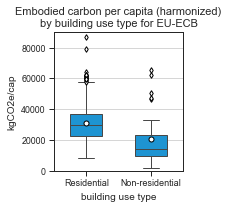

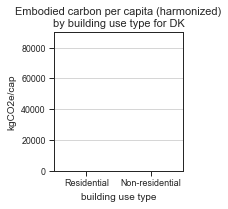

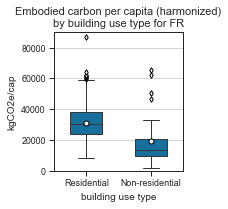

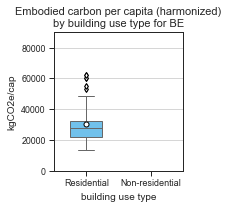

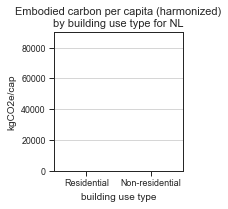

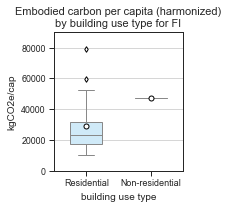

In [142]:
# choose subsets to visualize
list_df = [df_EUECB,df_DK,df_FR,df_BE,df_NL,df_FI]
# and their titles
list_title = ['EU-ECB','DK','FR', 'BE','NL','FI']

#Choose features on x-axis
_X_list = ['bldg_use_type']
#and their titles
_X_list_titles = ['building use type']

#Choose value on y-axis
_Y_list = ['GHG_sum_em_capita_harm']

#and its labels
_Y_list_label1 = [u'Embodied carbon per capita (harmonized)']
_Y_list_label2 = [u'kgCO2e/cap']

for i in range(0,len(_X_list)):
    for y in range(0,len(_Y_list)):
        for j in range(0,len(list_df)):
        
            _X = _X_list[i]
            _Y = _Y_list[y]

            # set figure size
            w = w_1
            h = w*f_1
            fig, ax = plt.subplots(figsize = (w,h))

            # create boxplot
            sns.boxplot(data = list_df[j],
                        x=_X,
                        y=_Y,
                        orient = 'v',
                        color = sns.color_palette(colors)[j],
                        order=['Residential','Non-residential'],
                        width=0.5,
                        fliersize=4,
                        linewidth=1,
                        showmeans=True,
                        meanprops={"marker":"o",
                                   "markerfacecolor":"white",
                                   "markeredgecolor":"black",
                                   "markersize":"5"},
                        flierprops={"markerfacecolor":"white",
                                   "markeredgecolor":"black"}
                        )

            # set plot title
            boxplot_title = str(_Y_list_label1[y]) + "\n" + 'by ' + _X_list_titles[i] + ' for ' + list_title[j]
            boxplot_file_name = str(_Y_list_label1[y]) + ' by ' + _X_list_titles[i] + ' for ' + list_title[j]
            plt.title(boxplot_title, fontsize = 11)

            # set axis labels
            plt.xlabel(_X_list_titles[i], fontsize = 10, labelpad = 5)
            plt.ylabel(_Y_list_label2[y], fontsize = 10, labelpad = 5)

            # adjust y-axis
            plt.ylim([0,90000])
            plt.xticks(rotation=0, fontsize=9)
            
            timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
            
            plt.tight_layout()
            fig.savefig('01_figures/0_boxplots/boxplot_'+boxplot_file_name+'_'+timestr+'.png', dpi = 600, bbox_inches="tight")
            fig.savefig('01_figures/0_boxplots/boxplot_'+boxplot_file_name+'_'+timestr+'.svg', format = 'svg', bbox_inches="tight")
            plt.show()

**Boxplot of "GHG_sum_em_capita_harm" vs "building use subtype" for each country in EU-ECB**

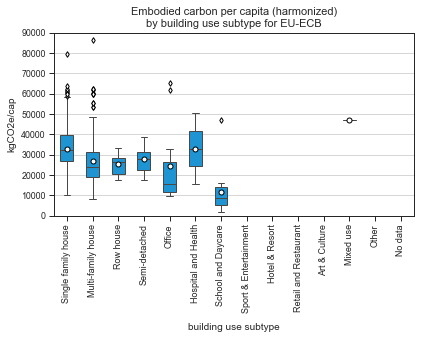

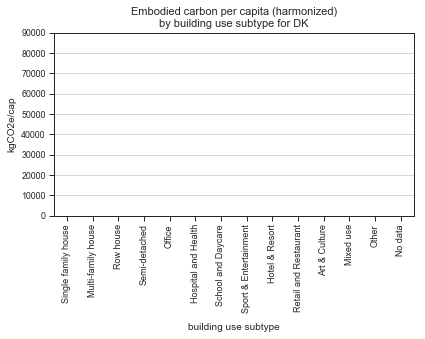

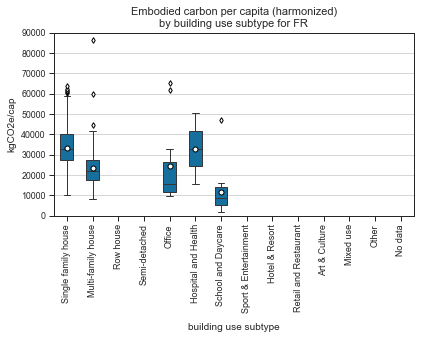

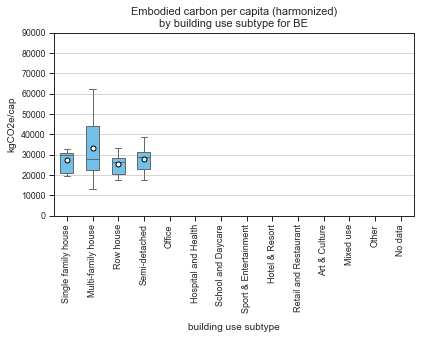

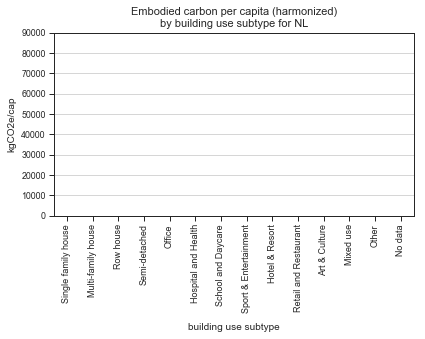

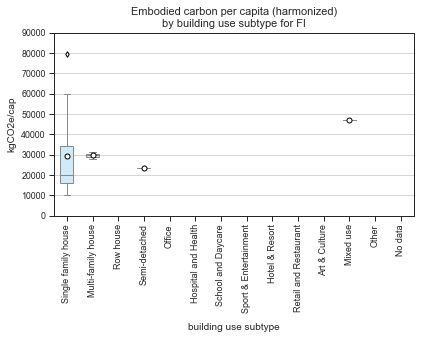

In [143]:
# choose subsets to visualize
list_df = [df_EUECB,df_DK,df_FR,df_BE,df_NL,df_FI]
# and their titles
list_title = ['EU-ECB','DK','FR', 'BE','NL','FI']

#Choose features on x-axis
_X_list = ['bldg_use_subtype']
#and their titles
_X_list_titles = ['building use subtype']

#Choose value on y-axis
_Y_list = ['GHG_sum_em_capita_harm']

#and its labels
_Y_list_label1 = [u'Embodied carbon per capita (harmonized)']
_Y_list_label2 = [u'kgCO2e/cap']

for i in range(0,len(_X_list)):
    for y in range(0,len(_Y_list)):
        for j in range(0,len(list_df)):
        
            _X = _X_list[i]
            _Y = _Y_list[y]
            
            # set figure size
            w = w_2
            h = w*f_2
            fig, ax = plt.subplots(figsize = (w,h))

            # create boxplot
            sns.boxplot(data = list_df[j],
                        x=_X,
                        y=_Y,
                        orient = 'v',
                        color = sns.color_palette(colors)[j],
                        order=['Single family house','Multi-family house','Row house','Semi-detached','Office','Hospital and Health','School and Daycare','Sport & Entertainment','Hotel & Resort','Retail and Restaurant','Art & Culture','Mixed use','Other','No data'],
                        width=0.5,
                        fliersize=4,
                        linewidth=1,
                        showmeans=True,
                        meanprops={"marker":"o",
                                   "markerfacecolor":"white",
                                   "markeredgecolor":"black",
                                   "markersize":"5"},
                        flierprops={"markerfacecolor":"white",
                                   "markeredgecolor":"black"}
                        )

            # set plot title
            boxplot_title = str(_Y_list_label1[y]) + "\n" + 'by ' + _X_list_titles[i] + ' for ' + list_title[j]
            boxplot_file_name = str(_Y_list_label1[y]) + ' by ' + _X_list_titles[i] + ' for ' + list_title[j]
            plt.title(boxplot_title, fontsize = 11)

            # set axis labels
            plt.xlabel(_X_list_titles[i], fontsize = 10, labelpad = 10)
            plt.ylabel(_Y_list_label2[y], fontsize = 10, labelpad = 5)

            # adjust y-axis
            plt.ylim([0,90000])
            plt.xticks(rotation=90,fontsize = 9)

            timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
            
            plt.tight_layout()
            fig.savefig('01_figures/0_boxplots/boxplot_'+boxplot_file_name+'_'+timestr+'.png', dpi = 600)
            fig.savefig('01_figures/0_boxplots/boxplot_'+boxplot_file_name+'_'+timestr+'.svg', format = 'svg')
            plt.show()

# Baseline for different types of structure and materials (3.3)

## Main figures

**Boxplot of "GHG sum em m2a harm" vs "building struct type" for each country in EU-ECB**

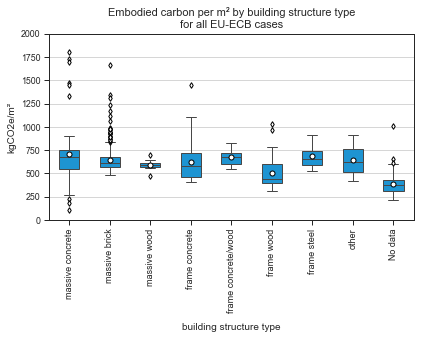

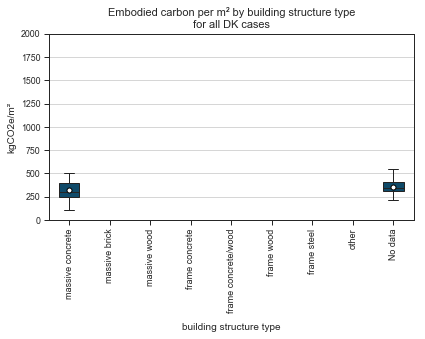

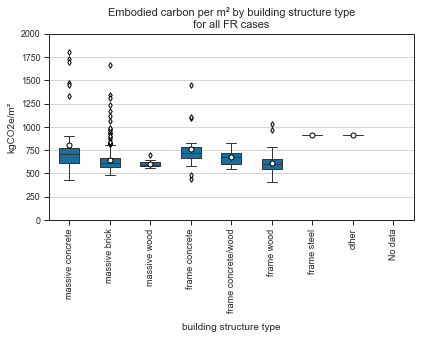

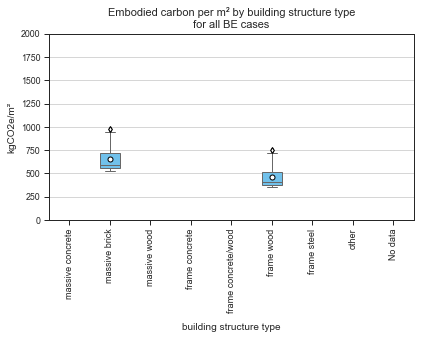

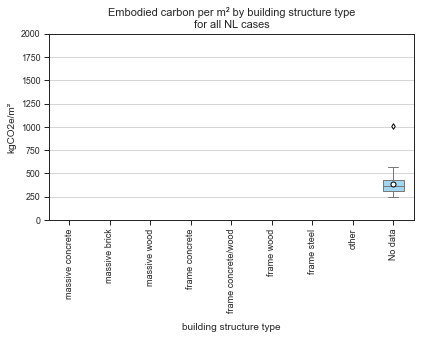

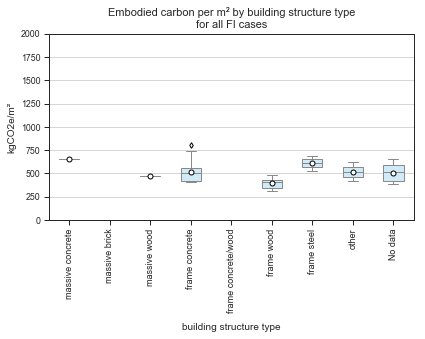

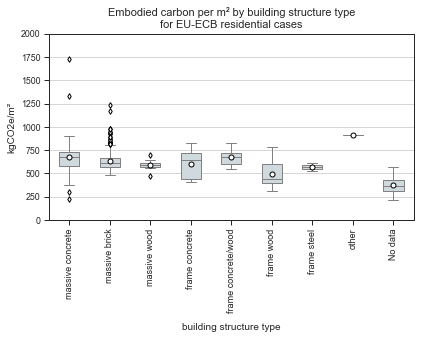

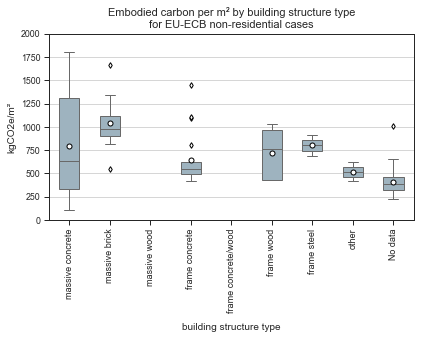

In [144]:
# choose subsets to visualize
list_df = [df_EUECB,
           df_DK,
           df_FR,
           df_BE,
           df_NL,
           df_FI,
           df_EUECB[df_EUECB['bldg_use_type'] == 'Residential'],
           df_EUECB[df_EUECB['bldg_use_type'] == 'Non-residential']]
# and their titles
list_title = ['all EU-ECB cases',
              'all DK cases',
              'all FR cases',
              'all BE cases',
              'all NL cases',
              'all FI cases',
              'EU-ECB residential cases',
              'EU-ECB non-residential cases']

#Choose features on x-axis
_X_list = ['bldg_struct_type']
#and their titles
_X_list_titles = ['building structure type']

#Choose value on y-axis
_Y_list = ['GHG_sum_em_m2_harm']

#and its labels
_Y_list_label1 = [u'Embodied carbon per m²']
_Y_list_label2 = [u'kgCO2e/m²']

for i in range(0,len(_X_list)):
    for y in range(0,len(_Y_list)):
        for j in range(0,len(list_df)):
        
            _X = _X_list[i]
            _Y = _Y_list[y]
            
            # set figure size
            w = w_2
            h = w*f_2
            fig, ax = plt.subplots(figsize = (w,h))
            
            # create boxplot
            sns.boxplot(data = list_df[j],
                        x=_X,
                        y=_Y,
                        orient = 'v',
                        color = sns.color_palette(colors)[j],
                        order=['massive concrete','massive brick','massive wood','frame concrete','frame concrete/wood','frame wood','frame steel','other','No data'],
                        width=0.5,
                        fliersize=4,
                        linewidth=1,
                        showmeans=True,
                        meanprops={"marker":"o",
                                   "markerfacecolor":"white",
                                   "markeredgecolor":"black",
                                   "markersize":"5"},
                        flierprops={"markerfacecolor":"white",
                                   "markeredgecolor":"black"}
                        )

            # set plot title
            boxplot_title = str(_Y_list_label1[y]) + ' by ' + _X_list_titles[i] + '\nfor ' + list_title[j]
            boxplot_file_name = str(_Y_list_label1[y]) + ' by ' + _X_list_titles[i] + ' for ' + list_title[j]
            plt.title(boxplot_title, fontsize = 11)

            # set axis labels
            plt.xlabel(_X_list_titles[i], fontsize = 10, labelpad = 10)
            plt.ylabel(_Y_list_label2[y], fontsize = 10, labelpad = 5)

            # adjust y-axis
            plt.ylim([0,2000])
            plt.xticks(rotation=90,fontsize = 9)

            timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
            
            plt.tight_layout()
            fig.savefig('01_figures/0_boxplots/boxplot_'+boxplot_file_name+'_'+timestr+'.png', dpi = 600)
            fig.savefig('01_figures/0_boxplots/boxplot_'+boxplot_file_name+'_'+timestr+'.svg', format = 'svg')
            plt.show()

## Appendix

**Structural types results per life cycle stages (divided into residential and non-residential)**

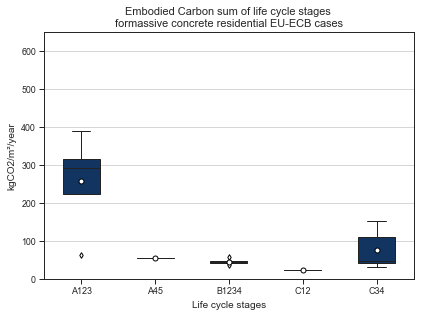

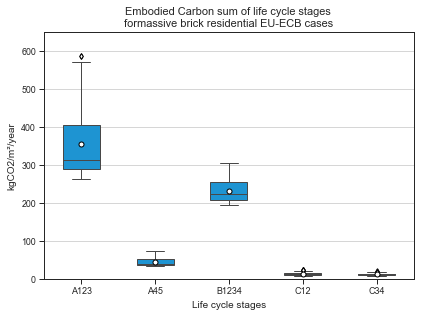

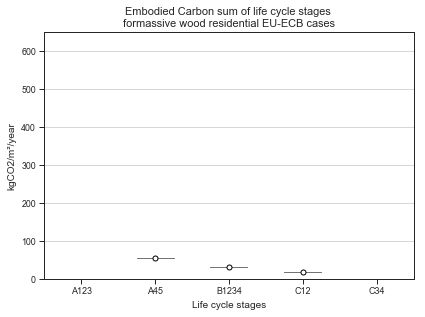

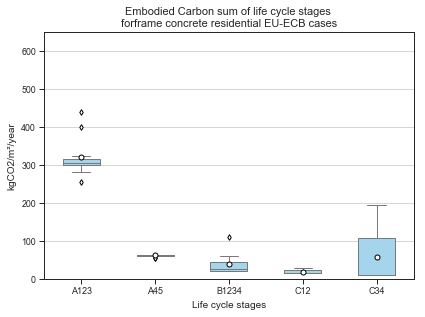

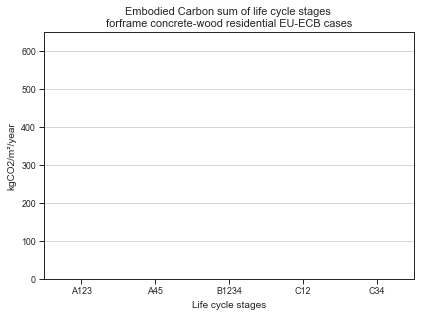

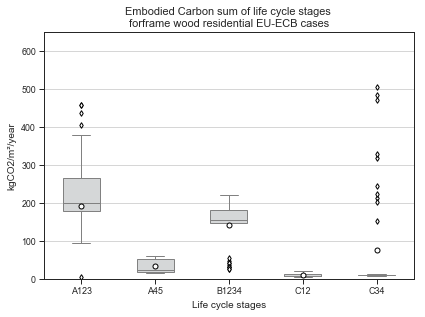

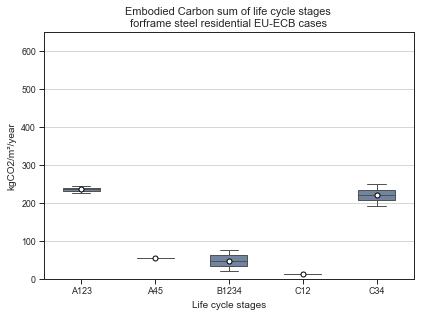

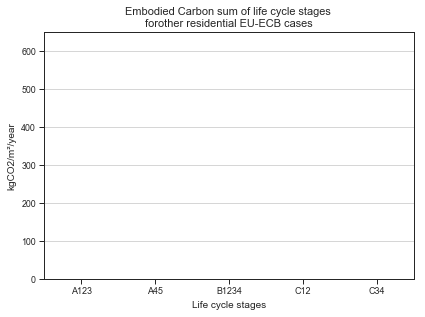

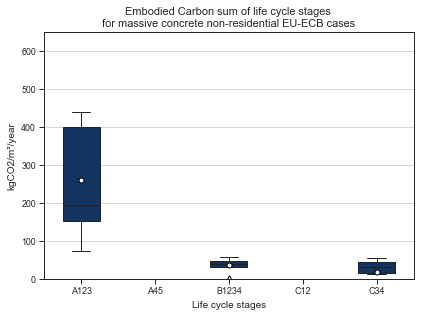

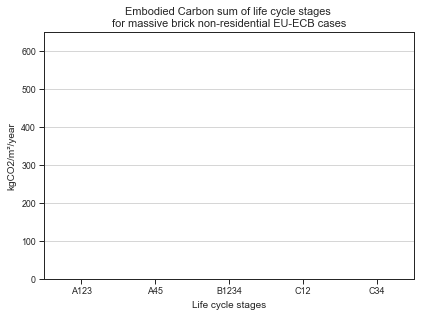

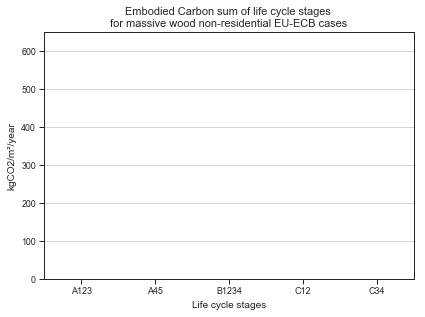

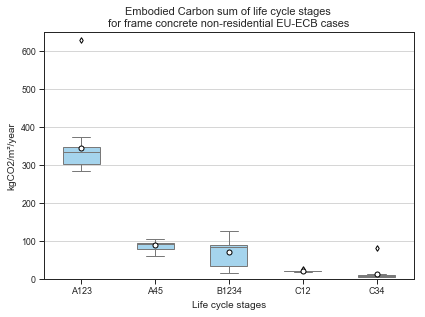

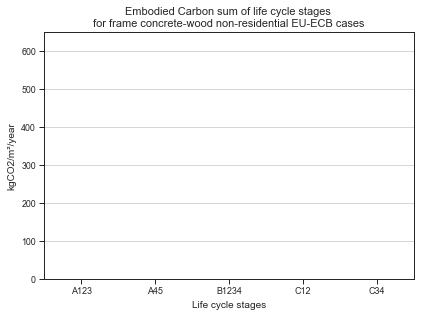

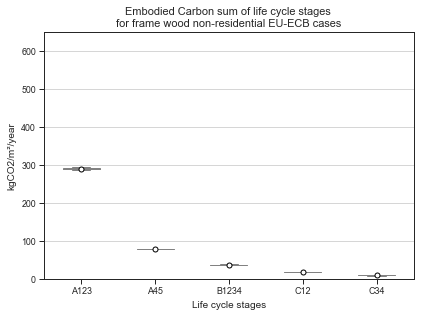

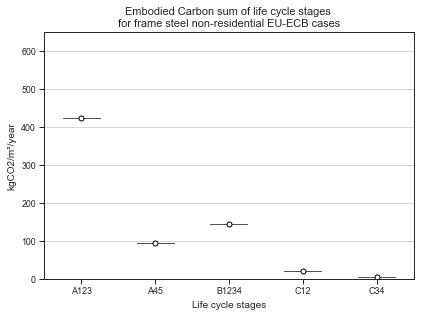

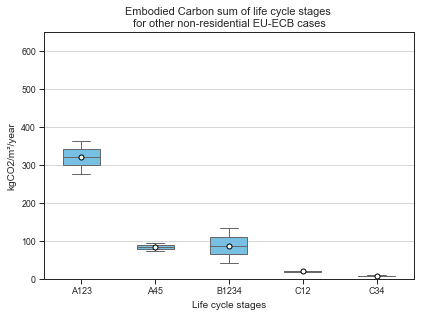

In [145]:
################################################## residential ##################################################

df = df_EUECB[df_EUECB['bldg_use_type'] == 'Residential']

df_list = [df[df['bldg_struct_type'] == 'massive concrete'],
           df[df['bldg_struct_type'] == 'massive brick'],
           df[df['bldg_struct_type'] == 'massive wood'],
           df[df['bldg_struct_type'] == 'frame concrete'],
           df[df['bldg_struct_type'] == 'frame concrete/wood'],
           df[df['bldg_struct_type'] == 'frame wood'],
           df[df['bldg_struct_type'] == 'frame steel'],
           df[df['bldg_struct_type'] == 'other']]

title_list = ['massive concrete',
              'massive brick',
              'massive wood',
              'frame concrete',
              'frame concrete-wood',
              'frame wood',
              'frame steel','other']

for i in range(0,len(df_list)):
    
    df = df_list[i]
    df = df[['GHG_A123_m2_harm',
             'GHG_A45_m2_harm',
             'GHG_B1234_m2_harm',
             #'GHG_B5_m2_harm',
             #'GHG_B67_m2_harm',
             'GHG_C12_m2_harm',
             'GHG_C34_m2_harm']]#.dropna(axis = 0, how = 'all')

    df.rename(columns = {"GHG_A123_m2_harm":"A123",
                         "GHG_A45_m2_harm":"A45",
                         "GHG_B1234_m2_harm":"B1234",
                         #"GHG_B5_m2_harm":"B5",
                         #"GHG_B67_m2_harm":"B67",
                         "GHG_C12_m2_harm":"C12",
                         "GHG_C34_m2_harm":"C34"}, inplace = True)

    # set figure size
    w = w_2
    h = w*f_3
    fig, ax = plt.subplots(figsize = (w,h))

    # create boxplot
    sns.boxplot(data = df,
                orient = 'v',
                color = sns.color_palette(colors2)[i],
                #order=['','','','','','','','',''],
                width=0.5,
                fliersize=4,
                linewidth=1,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white",
                           "markeredgecolor":"black",
                           "markersize":"5"},
                flierprops={"markerfacecolor":"white",
                            "markeredgecolor":"black"}
                )
    
    # set plot title
    plt.title('Embodied Carbon sum of life cycle stages \nfor'+title_list[i]+' residential EU-ECB cases', fontsize = 11)

    # set axis labels
    plt.xlabel('Life cycle stages', fontsize = 10, labelpad = 5)
    plt.ylabel(u'kgCO2/m²/year', fontsize = 10, labelpad = 5)

    # adjust y-axis
    plt.ylim([0,650])
    plt.xticks(rotation=0,fontsize = 9)

    timestr = time.strftime("%Y-%m-%d_%H-%M-%S")    
    
    plt.tight_layout()
    fig.savefig('01_figures/0_boxplots/ghg_life_cycle_stages_'+title_list[i]+'_residential_'+timestr+'.png', dpi = 600)
    fig.savefig('01_figures/0_boxplots/ghg_life_cycle_stages_'+title_list[i]+'_residential_'+timestr+'.svg', format = 'svg')
    plt.show()
    
################################################## non-residential ##################################################

df = df_EUECB[df_EUECB['bldg_use_type'] == 'Non-residential']

df_list = [df[df['bldg_struct_type'] == 'massive concrete'],
           df[df['bldg_struct_type'] == 'massive brick'],
           df[df['bldg_struct_type'] == 'massive wood'],
           df[df['bldg_struct_type'] == 'frame concrete'],
           df[df['bldg_struct_type'] == 'frame concrete/wood'],
           df[df['bldg_struct_type'] == 'frame wood'],
           df[df['bldg_struct_type'] == 'frame steel'],
           df[df['bldg_struct_type'] == 'other']]

title_list = ['massive concrete',
              'massive brick',
              'massive wood',
              'frame concrete',
              'frame concrete-wood',
              'frame wood',
              'frame steel','other']

for i in range(0,len(df_list)):
    
    df = df_list[i]
    df = df[['GHG_A123_m2_harm',
             'GHG_A45_m2_harm',
             'GHG_B1234_m2_harm',
             #'GHG_B5_m2_harm',
             #'GHG_B67_m2_harm',
             'GHG_C12_m2_harm',
             'GHG_C34_m2_harm']]#.dropna(axis = 0, how = 'all')

    df.rename(columns = {"GHG_A123_m2_harm":"A123",
                         "GHG_A45_m2_harm":"A45",
                         "GHG_B1234_m2_harm":"B1234",
                         #"GHG_B5_m2_harm":"B5",
                         #"GHG_B67_m2_harm":"B67",
                         "GHG_C12_m2_harm":"C12",
                         "GHG_C34_m2_harm":"C34"}, inplace = True)

    # set figure size
    w = w_2
    h = w*f_3
    fig, ax = plt.subplots(figsize = (w,h))

    # create boxplot
    sns.boxplot(data = df,
                orient = 'v',
                color = sns.color_palette(colors2)[i],
                #order=['','','','','','','','',''],
                width=0.5,
                fliersize=4,
                linewidth=1,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white",
                           "markeredgecolor":"black",
                           "markersize":"5"},
                flierprops={"markerfacecolor":"white",
                            "markeredgecolor":"black"}
                )

    # set plot title
    plt.title('Embodied Carbon sum of life cycle stages \nfor '+title_list[i]+' non-residential EU-ECB cases', fontsize = 11)

    # set axis labels
    plt.xlabel('Life cycle stages', fontsize = 10, labelpad = 5)
    plt.ylabel(u'kgCO2/m²/year', fontsize = 10, labelpad = 5)

    # adjust y-axis
    plt.ylim([0,650])
    plt.xticks(rotation=0,fontsize = 9)

    timestr = time.strftime("%Y-%m-%d_%H-%M-%S")    
    
    plt.tight_layout()
    fig.savefig('01_figures/0_boxplots/ghg_life_cycle_stages_'+title_list[i]+'_non_residential_'+timestr+'.png', dpi = 600)
    fig.savefig('01_figures/0_boxplots/ghg_life_cycle_stages_'+title_list[i]+'_non_residential_'+timestr+'.svg', format = 'svg')
    plt.show()

# Contribution of different life cycle stages (3.4)

## Main figures

Only **embodied** emission related life cycle stages

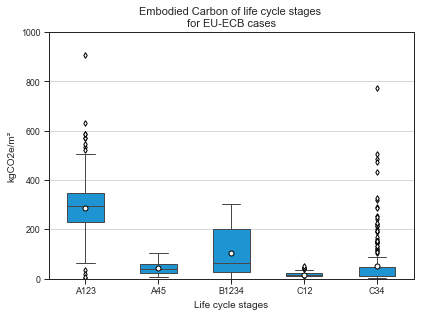

In [146]:
df = df_EUECB
df = df[['GHG_A123_m2_harm',
         'GHG_A45_m2_harm',
         'GHG_B1234_m2_harm',
         'GHG_C12_m2_harm',
         'GHG_C34_m2_harm']]#.dropna(axis = 0, how = 'all')

df.rename(columns = {"GHG_A123_m2_harm":"A123",
                     "GHG_A45_m2_harm":"A45",
                     "GHG_B1234_m2_harm":"B1234",
                     "GHG_C12_m2_harm":"C12",
                     "GHG_C34_m2_harm":"C34"}, inplace = True)

# set figure size
w = w_2
h = w*f_3
fig, ax = plt.subplots(figsize = (w,h))

# create boxplot
sns.boxplot(data = df,
            orient = 'v',
            color = sns.color_palette(colors)[0],
            #order=['','','','','','','','',''],
            width=0.5,
            fliersize=4,
            linewidth=1,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"5"},
            flierprops={"markerfacecolor":"white",
                        "markeredgecolor":"black"}
            )

# set plot title
plt.title('Embodied Carbon of life cycle stages \nfor EU-ECB cases', fontsize = 11)

# set axis labels
plt.xlabel('Life cycle stages', fontsize = 10, labelpad = 5)
plt.ylabel(u'kgCO2e/m²', fontsize = 10, labelpad = 5)

# adjust axis
plt.ylim([0,1000])
plt.xticks(rotation=0,fontsize = 9)

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")    

plt.tight_layout()
fig.savefig('01_figures/0_boxplots/ghg_life_cycle_stages_embodied_'+timestr+'.png', dpi = 600)
fig.savefig('01_figures/0_boxplots/ghg_life_cycle_stages_embodied_'+timestr+'.svg', format = 'svg')
plt.show()

## Appendix

**residential cases**

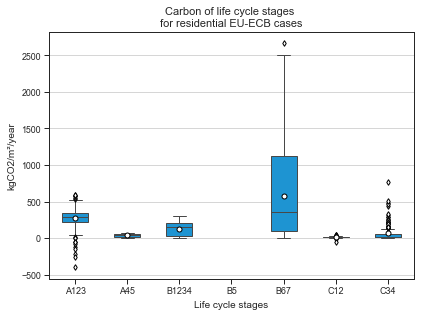

In [147]:
df = df_EUECB[df_EUECB['bldg_use_type'] == 'Residential']

# Recalculate values over [50 years] RSP, as oposed to 'per year' values.
# Values per life cycle stage groups

df['GHG_A123_m2_harm'] = df['GHG_A123_m2a_harm'] * RSP_harm
df['GHG_A45_m2_harm'] = df['GHG_A45_m2a_harm'] * RSP_harm
df['GHG_B1234_m2_harm'] = df['GHG_B1234_m2a_harm'] * RSP_harm
df['GHG_B5_m2_harm'] = df['GHG_B5_m2a_harm'] * RSP_harm
df['GHG_B67_m2_harm'] = df['GHG_B67_m2a_harm'] * RSP_harm
df['GHG_C12_m2_harm'] = df['GHG_C12_m2a_harm'] * RSP_harm
df['GHG_C34_m2_harm'] = df['GHG_C34_m2a_harm'] * RSP_harm

df = df[['GHG_A123_m2_harm','GHG_A45_m2_harm','GHG_B1234_m2_harm','GHG_B5_m2_harm','GHG_B67_m2_harm','GHG_C12_m2_harm','GHG_C34_m2_harm']]#.dropna(axis = 0, how = 'all')

df.rename(columns = {"GHG_A123_m2_harm":"A123",
                    "GHG_A45_m2_harm":"A45",
                    "GHG_B1234_m2_harm":"B1234",
                    "GHG_B5_m2_harm":"B5",
                    "GHG_B67_m2_harm":"B67",
                    "GHG_C12_m2_harm":"C12",
                    "GHG_C34_m2_harm":"C34"}, inplace = True)

# set figure size
w = w_2
h = w*f_3
fig, ax = plt.subplots(figsize = (w,h))

# create boxplot
sns.boxplot(data = df,
            orient = 'v',
            color = sns.color_palette(colors)[0],
            #order=['','','','','','','','',''],
            width=0.5,
            fliersize=4,
            linewidth=1,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"5"},
            flierprops={"markerfacecolor":"white",
                       "markeredgecolor":"black"}
            )
            
# set plot title
plt.title('Carbon of life cycle stages \nfor residential EU-ECB cases', fontsize = 11)

# set axis labels
plt.xlabel('Life cycle stages', fontsize = 10, labelpad = 5)
plt.ylabel(u'kgCO2/m²/year', fontsize = 10, labelpad = 5)

# adjust axis
plt.xticks(rotation=0,fontsize = 9)

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")    

plt.tight_layout()
fig.savefig('01_figures/0_boxplots/ghg_life_cycle_residential_'+timestr+'.png', dpi = 600)
fig.savefig('01_figures/0_boxplots/ghg_life_cycle_residential_'+timestr+'.svg', format = 'svg')
plt.show()

**non-residential cases**

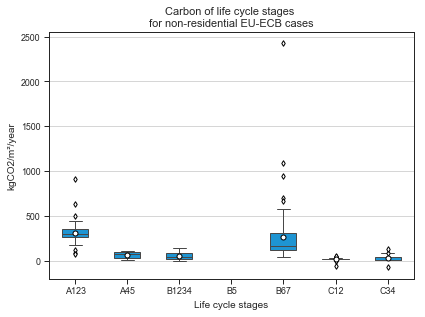

In [148]:
df = df_EUECB[df_EUECB['bldg_use_type'] == 'Non-residential']

# Recalculate values over [50 years] RSP, as oposed to 'per year' values.
# Values per life cycle stage groups

df['GHG_A123_m2_harm'] = df['GHG_A123_m2a_harm'] * RSP_harm
df['GHG_A45_m2_harm'] = df['GHG_A45_m2a_harm'] * RSP_harm
df['GHG_B1234_m2_harm'] = df['GHG_B1234_m2a_harm'] * RSP_harm
df['GHG_B5_m2_harm'] = df['GHG_B5_m2a_harm'] * RSP_harm
df['GHG_B67_m2_harm'] = df['GHG_B67_m2a_harm'] * RSP_harm
df['GHG_C12_m2_harm'] = df['GHG_C12_m2a_harm'] * RSP_harm
df['GHG_C34_m2_harm'] = df['GHG_C34_m2a_harm'] * RSP_harm

df = df[['GHG_A123_m2_harm','GHG_A45_m2_harm','GHG_B1234_m2_harm','GHG_B5_m2_harm','GHG_B67_m2_harm','GHG_C12_m2_harm','GHG_C34_m2_harm']]#.dropna(axis = 0, how = 'all')

df.rename(columns = {"GHG_A123_m2_harm":"A123",
                    "GHG_A45_m2_harm":"A45",
                    "GHG_B1234_m2_harm":"B1234",
                    "GHG_B5_m2_harm":"B5",
                    "GHG_B67_m2_harm":"B67",
                    "GHG_C12_m2_harm":"C12",
                    "GHG_C34_m2_harm":"C34"}, inplace = True)

# set figure size
w = w_2
h = w*f_3
fig, ax = plt.subplots(figsize = (w,h))

# create boxplot
sns.boxplot(data = df,
            orient = 'v',
            color = sns.color_palette(colors)[0],
            #order=['','','','','','','','',''],
            width=0.5,
            fliersize=4,
            linewidth=1,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"5"},
            flierprops={"markerfacecolor":"white",
                       "markeredgecolor":"black"}
            )

# set plot title
plt.title('Carbon of life cycle stages \nfor non-residential EU-ECB cases', fontsize = 11)

# set axis labels
plt.xlabel('Life cycle stages', fontsize = 10, labelpad = 5)
plt.ylabel(u'kgCO2/m²/year', fontsize = 10, labelpad = 5)

# adjust axis
plt.xticks(rotation=0,fontsize = 9)

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")    

plt.tight_layout()
fig.savefig('01_figures/0_boxplots/ghg_life_cycle_non_residential_'+timestr+'.png', dpi = 600)
fig.savefig('01_figures/0_boxplots/ghg_life_cycle_non_residential_'+timestr+'.svg', format = 'svg')
plt.show()

# Contribution of different building parts (3.5)

## Main figures

**Visualize the impact of individual building parts for all cases**

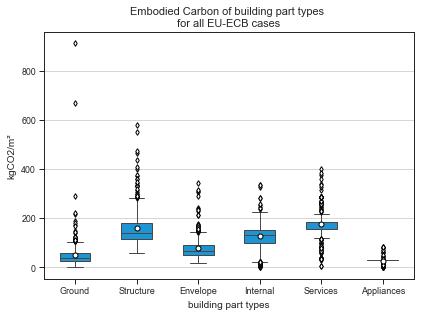

In [149]:
# Harmonize building part data before visualizing the impact

df = df_EUECB

df['GHG_P1_sum_m2a_harm'] = df['GHG_P1_sum_m2a'] * df['lca_RSP']/50
df['GHG_P2_sum_m2a_harm'] = df['GHG_P2_sum_m2a'] * df['lca_RSP']/50
df['GHG_P34_sum_m2a_harm'] = df['GHG_P34_sum_m2a'] * df['lca_RSP']/50
df['GHG_P4_sum_m2a_harm'] = df['GHG_P4_sum_m2a'] * df['lca_RSP']/50
df['GHG_P56_sum_m2a_harm'] = df['GHG_P56_sum_m2a'] * df['lca_RSP']/50
df['GHG_P78_sum_m2a_harm'] = df['GHG_P78_sum_m2a'] * df['lca_RSP']/50

# Recalculate values over [50 years] RSP, as oposed to 'per year' values.
# Values for building part groups

df['GHG_P1_sum_m2_harm'] = df['GHG_P1_sum_m2a_harm'] * RSP_harm
df['GHG_P2_sum_m2_harm'] = df['GHG_P2_sum_m2a_harm'] * RSP_harm
df['GHG_P34_sum_m2_harm'] = df['GHG_P34_sum_m2a_harm'] * RSP_harm
df['GHG_P4_sum_m2_harm'] = df['GHG_P4_sum_m2a_harm'] * RSP_harm
df['GHG_P56_sum_m2_harm'] = df['GHG_P56_sum_m2a_harm'] * RSP_harm
df['GHG_P78_sum_m2_harm'] = df['GHG_P78_sum_m2a_harm'] * RSP_harm

# Harmonized total across RSP

df2 = df[['GHG_P1_sum_m2_harm','GHG_P2_sum_m2_harm','GHG_P34_sum_m2_harm','GHG_P4_sum_m2_harm','GHG_P56_sum_m2_harm','GHG_P78_sum_m2_harm']].dropna(axis = 0, how = 'any')

df2.rename(columns = {"GHG_P1_sum_m2_harm":"Ground",
                    "GHG_P2_sum_m2_harm":"Structure",
                    "GHG_P34_sum_m2_harm":"Envelope",
                    "GHG_P4_sum_m2_harm":"Internal",
                    "GHG_P56_sum_m2_harm":"Services",
                    "GHG_P78_sum_m2_harm":"Appliances"}, inplace = True)

# set figure size
w = w_2
h = w*f_3
fig, ax = plt.subplots(figsize = (w,h))

# create boxplot
sns.boxplot(data = df2,
            orient = 'v',
            color = sns.color_palette(colors)[0],
            #order=['','','','','','','','',''],
            width=0.5,
            fliersize=4,
            linewidth=1,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"5"},
            flierprops={"markerfacecolor":"white",
                       "markeredgecolor":"black"}
            )

# set plot title
plt.title('Embodied Carbon of building part types \nfor all EU-ECB cases', fontsize = 11)

# set axis labels
plt.xlabel('building part types', fontsize = 10, labelpad = 5)
plt.ylabel(u'kgCO2/m²', fontsize = 10, labelpad = 5)

# adjust axis
plt.xticks(rotation=0,fontsize = 9)

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")    

plt.tight_layout()
fig.savefig('01_figures/0_boxplots/ghg_building_part_types_all_'+timestr+'.png', dpi = 600)
fig.savefig('01_figures/0_boxplots/ghg_building_part_types_all_'+timestr+'.svg', format = 'svg')
plt.show()

In [150]:
df_DK

,site_country_code,admin_project_code,admin_data_partner,admin_project_contact,bldg_use_type,bldg_use_subtype,bldg_project_status,site_country,bldg_year_permit,bldg_year_complete,bldg_year_complete_interval,bldg_QTO_type,bldg_area_definition,bldg_area_gfa,bldg_area_hfa,bldg_area_interval,bldg_users_total,bldg_floors_ag,bldg_floors_bg,bldg_struct_type,bldg_roof_type,bldg_energy_class_general,bldg_energy_class_country,bldg_certification,inv_energy_consumption,inv_mat_mass_total,inv_mat_mass_total_m2,inv_mat_mass_total_capita,inv_mat_mass_sum_top_5,inv_mat_mass_ratio,inv_mat_1_type,inv_mat_1_mass,inv_mat_2_type,inv_mat_2_mass,inv_mat_3_type,inv_mat_3_mass,inv_mat_4_type,inv_mat_4_mass,inv_mat_5_type,inv_mat_5_mass,mass_aluminium,mass_bamboo,mass_brass_copper,mass_cement_mortar,mass_ceramics,mass_concrete_reinforced,mass_concrete_wo_reinforcement,mass_earth,mass_EPS_XPS,mass_fungi,mass_glass,mass_metals,mass_plastics,mass_steel_reinforcement,mass_stone,mass_stone_wool,mass_straw_hemp,mass_wood,mass_other,eurostat_metal_materials,eurostat_non-metallic_minerals,eurostat_fossil_energy_materials,eurostat_biomass_based_materials,lca_RSP,lca_software,lca_database,lca_scenarios_decarbonisation,scope_parts,scope_LCS,scope_LCM,scope_parts_1_ground,scope_parts_2_structure,scope_parts_3_secondary,scope_parts_4_finishes,scope_parts_5_mechanical,scope_parts_6_electrical,scope_parts_6+_renewables,scope_parts_7_facilities,scope_parts_8_fittings,scope_LCS_A123,scope_LCS_A4,scope_LCS_A5,scope_LCS_B1,scope_LCS_B2,scope_LCS_B3,scope_LCS_B4,scope_LCS_B5,scope_LCS_B6,scope_LCS_B7,scope_LCS_B8,scope_LCS_C1,scope_LCS_C2,scope_LCS_C3,scope_LCS_C4,scope_LCS_D,scope_handling_D,GHG_sum_em,GHG_sum_em_m2a,GHG_sum_em_capita_a,GHG_A_m2a,GHG_B_em_m2a,GHG_B_op_m2a,GHG_C_m2a,GHG_A_capita_a,GHG_B_em_capita_a,GHG_B_op_capita_a,GHG_C_capita_a,GHG_A1_m2a,GHG_A2_m2a,GHG_A3_m2a,GHG_A4_m2a,GHG_A5_m2a,GHG_B1_m2a,GHG_B2_m2a,GHG_B3_m2a,GHG_B4_m2a,GHG_B6_m2a,GHG_B7_m2a,GHG_C1_m2a,GHG_C2_m2a,GHG_C3_m2a,GHG_C4_m2a,GHG_A123_m2a,GHG_A45_m2a,GHG_B1234_m2a,GHG_B5_m2a,GHG_B67_m2a,GHG_C12_m2a,GHG_C34_m2a,GHG_D_m2a,GHG_A123_m2a_APEN,GHG_A45_m2a_APEN,GHG_B1234_m2a_APEN,GHG_B5_m2a_APEN,GHG_B67_m2a_APEN,GHG_C12_m2a_APEN,GHG_C34_m2a_APEN,GHG_D_m2a_APEN,GHG_sum_em_m2a_APEN,GHG_sum_op_m2a_APEN,GHG_A123_m2a_harm,GHG_A45_m2a_harm,GHG_B1234_m2a_harm,GHG_B5_m2a_harm,GHG_B67_m2a_harm,GHG_C12_m2a_harm,GHG_C34_m2a_harm,GHG_sum_em_m2a_harm,GHG_A123_m2a_harm_LCM,GHG_A45_m2a_harm_LCM,GHG_B1234_m2a_harm_LCM,GHG_B5_m2a_harm_LCM,GHG_C12_m2a_harm_LCM,GHG_C34_m2a_harm_LCM,GHG_P1_sum_m2a,GHG_P1_A123_m2a,GHG_P1_A45_m2a,GHG_P1_B1234_m2a,GHG_P1_B5_m2a,GHG_P1_C12_m2a,GHG_P1_C34_m2a,GHG_P1_D_m2a,GHG_P2_sum_m2a,GHG_P2_A123_m2a,GHG_P2_A45_m2a,GHG_P2_B1234_m2a,GHG_P2_B5_m2a,GHG_P2_C12_m2a,GHG_P2_C34_m2a,GHG_P2_D_m2a,GHG_P34_sum_m2a,GHG_P34_A123_m2a,GHG_P34_A45_m2a,GHG_P34_B1234_m2a,GHG_P34_B5_m2a,GHG_P34_C12_m2a,GHG_P34_C34_m2a,GHG_P34_D_m2a,GHG_P4_sum_m2a,GHG_P4_A123_m2a,GHG_P4_A45_m2a,GHG_P4_B1234_m2a,GHG_P4_B5_m2a,GHG_P4_C12_m2a,GHG_P4_C34_m2a,GHG_P4_D_m2a,GHG_P56_sum_m2a,GHG_P56_A123_m2a,GHG_P56_A45_m2a,GHG_P56_B1234_m2a,GHG_P56_B5_m2a,GHG_P56_C12_m2a,GHG_P56_C34_m2a,GHG_P56_D_m2a,GHG_P78_sum_m2a,GHG_P78_A123_m2a,GHG_P78_A45_m2a,GHG_P78_B1234_m2a,GHG_P78_B5_m2a,GHG_P78_C12_m2a,GHG_P78_C34_m2a,GHG_P78_D_m2a,GHG_sum_em_m2pertonGHG_a,GHG_sum_em_m2pertonGHG,GHG_sum_op_m2pertonGHG_a,GHG_sum_op_m2pertonGHG,GHG_sum_em_cappertonGHG_a,GHG_sum_em_cappertonGHG,GHG_sum_op_cappertonGHG_a,GHG_sum_op_cappertonGHG,ratio_A123_LCM,ratio_A45_LCM,ratio_B1234_LCM,ratio_B5_LCM,ratio_C12_LCM,ratio_C34_LCM,ratio_A123_parts,ratio_A45_parts,ratio_B1234_parts,ratio_B5_parts,ratio_C12_parts,ratio_C34_parts,GHG_sum_em_m2,GHG_sum_em_m2_harm,GHG_A123_m2,GHG_A123_m2_harm,GHG_A45_m2,GHG_A45_m2_harm,GHG_B1234_m2,GHG_B1234_m2_harm,GHG_B5_m2,GHG_B5_m2_harm,GHG_C12_m2,GHG_C12_m2_harm,GHG_C34_m2,GHG_C34_m2_harm,C_total,EC_shareX,OC_shareX,GHG_B67_m2,GHG_sum_em_capita_harm,GHG_B67_m2_harm
0,DK,BUILD01,BUILD,BUILD,Non-residential,Other,New Built,De

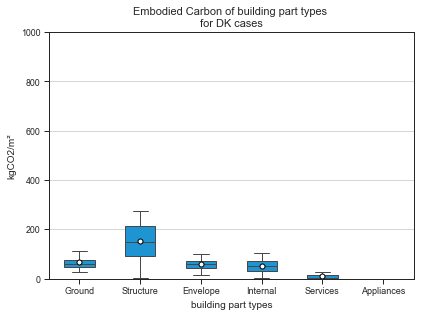

In [151]:
# Harmonize building part data before visualizing the impact

df = df_DK

df['GHG_P1_sum_m2a_harm'] = df['GHG_P1_sum_m2a'] * df['lca_RSP']/50
df['GHG_P2_sum_m2a_harm'] = df['GHG_P2_sum_m2a'] * df['lca_RSP']/50
df['GHG_P34_sum_m2a_harm'] = df['GHG_P34_sum_m2a'] * df['lca_RSP']/50
df['GHG_P4_sum_m2a_harm'] = df['GHG_P4_sum_m2a'] * df['lca_RSP']/50
df['GHG_P56_sum_m2a_harm'] = df['GHG_P56_sum_m2a'] * df['lca_RSP']/50
df['GHG_P78_sum_m2a_harm'] = df['GHG_P78_sum_m2a'] * df['lca_RSP']/50

# Recalculate values over [50 years] RSP, as oposed to 'per year' values.
# Values for building part groups

df['GHG_P1_sum_m2_harm'] = df['GHG_P1_sum_m2a_harm'] * RSP_harm
df['GHG_P2_sum_m2_harm'] = df['GHG_P2_sum_m2a_harm'] * RSP_harm
df['GHG_P34_sum_m2_harm'] = df['GHG_P34_sum_m2a_harm'] * RSP_harm
df['GHG_P4_sum_m2_harm'] = df['GHG_P4_sum_m2a_harm'] * RSP_harm
df['GHG_P56_sum_m2_harm'] = df['GHG_P56_sum_m2a_harm'] * RSP_harm
df['GHG_P78_sum_m2_harm'] = df['GHG_P78_sum_m2a_harm'] * RSP_harm

# Harmonized total across RSP

df2 = df[['GHG_P1_sum_m2_harm','GHG_P2_sum_m2_harm','GHG_P34_sum_m2_harm','GHG_P4_sum_m2_harm','GHG_P56_sum_m2_harm','GHG_P78_sum_m2_harm']].dropna(axis = 0, how = 'all')

df2.rename(columns = {"GHG_P1_sum_m2_harm":"Ground",
                    "GHG_P2_sum_m2_harm":"Structure",
                    "GHG_P34_sum_m2_harm":"Envelope",
                    "GHG_P4_sum_m2_harm":"Internal",
                    "GHG_P56_sum_m2_harm":"Services",
                    "GHG_P78_sum_m2_harm":"Appliances"}, inplace = True)

# set figure size
w = w_2
h = w*f_3
fig, ax = plt.subplots(figsize = (w,h))

# create boxplot
sns.boxplot(data = df2,
            orient = 'v',
            color = sns.color_palette(colors)[0],
            #order=['','','','','','','','',''],
            width=0.5,
            fliersize=4,
            linewidth=1,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"5"},
            flierprops={"markerfacecolor":"white",
                       "markeredgecolor":"black"}
            )

# set plot title
plt.title('Embodied Carbon of building part types \nfor DK cases', fontsize = 11)

# set axis labels
plt.xlabel('building part types', fontsize = 10, labelpad = 5)
plt.ylabel(u'kgCO2/m²', fontsize = 10, labelpad = 5)

# adjust axis
plt.ylim([0,1000])
plt.xticks(rotation=0,fontsize = 9)

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")    

plt.tight_layout()
fig.savefig('01_figures/0_boxplots/ghg_building_part_types_DK_'+timestr+'.png', dpi = 600)
fig.savefig('01_figures/0_boxplots/ghg_building_part_types_DK_'+timestr+'.svg', format = 'svg')
plt.show()

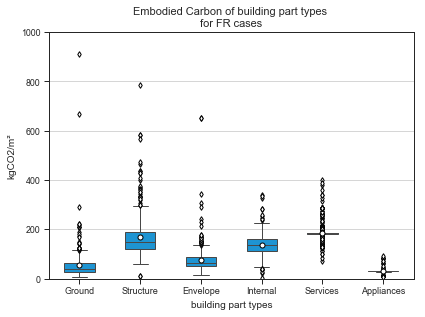

In [152]:
# Harmonize building part data before visualizing the impact

df = df_FR

df['GHG_P1_sum_m2a_harm'] = df['GHG_P1_sum_m2a'] * df['lca_RSP']/50
df['GHG_P2_sum_m2a_harm'] = df['GHG_P2_sum_m2a'] * df['lca_RSP']/50
df['GHG_P34_sum_m2a_harm'] = df['GHG_P34_sum_m2a'] * df['lca_RSP']/50
df['GHG_P4_sum_m2a_harm'] = df['GHG_P4_sum_m2a'] * df['lca_RSP']/50
df['GHG_P56_sum_m2a_harm'] = df['GHG_P56_sum_m2a'] * df['lca_RSP']/50
df['GHG_P78_sum_m2a_harm'] = df['GHG_P78_sum_m2a'] * df['lca_RSP']/50

# Recalculate values over [50 years] RSP, as oposed to 'per year' values.
# Values for building part groups

df['GHG_P1_sum_m2_harm'] = df['GHG_P1_sum_m2a_harm'] * RSP_harm
df['GHG_P2_sum_m2_harm'] = df['GHG_P2_sum_m2a_harm'] * RSP_harm
df['GHG_P34_sum_m2_harm'] = df['GHG_P34_sum_m2a_harm'] * RSP_harm
df['GHG_P4_sum_m2_harm'] = df['GHG_P4_sum_m2a_harm'] * RSP_harm
df['GHG_P56_sum_m2_harm'] = df['GHG_P56_sum_m2a_harm'] * RSP_harm
df['GHG_P78_sum_m2_harm'] = df['GHG_P78_sum_m2a_harm'] * RSP_harm

# Harmonized total across RSP

df2 = df[['GHG_P1_sum_m2_harm','GHG_P2_sum_m2_harm','GHG_P34_sum_m2_harm','GHG_P4_sum_m2_harm','GHG_P56_sum_m2_harm','GHG_P78_sum_m2_harm']].dropna(axis = 0, how = 'all')

df2.rename(columns = {"GHG_P1_sum_m2_harm":"Ground",
                    "GHG_P2_sum_m2_harm":"Structure",
                    "GHG_P34_sum_m2_harm":"Envelope",
                    "GHG_P4_sum_m2_harm":"Internal",
                    "GHG_P56_sum_m2_harm":"Services",
                    "GHG_P78_sum_m2_harm":"Appliances"}, inplace = True)

# set figure size
w = w_2
h = w*f_3
fig, ax = plt.subplots(figsize = (w,h))

# create boxplot
sns.boxplot(data = df2,
            orient = 'v',
            color = sns.color_palette(colors)[0],
            #order=['','','','','','','','',''],
            width=0.5,
            fliersize=4,
            linewidth=1,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"5"},
            flierprops={"markerfacecolor":"white",
                       "markeredgecolor":"black"}
            )

# set plot title
plt.title('Embodied Carbon of building part types \nfor FR cases', fontsize = 11)

# set axis labels
plt.xlabel('building part types', fontsize = 10, labelpad = 5)
plt.ylabel(u'kgCO2/m²', fontsize = 10, labelpad = 5)

# adjust axis
plt.ylim([0,1000])
plt.xticks(rotation=0,fontsize = 9)

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")    

plt.tight_layout()
fig.savefig('01_figures/0_boxplots/ghg_building_part_types_FR_'+timestr+'.png', dpi = 600)
fig.savefig('01_figures/0_boxplots/ghg_building_part_types_FR_'+timestr+'.svg', format = 'svg')
plt.show()

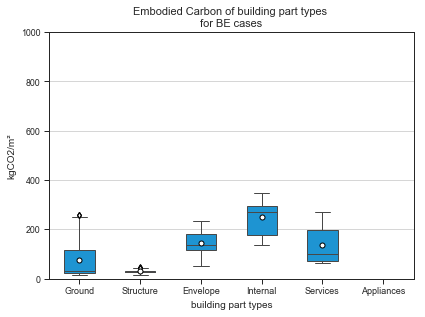

In [153]:
# Harmonize building part data before visualizing the impact

df = df_BE

df['GHG_P1_sum_m2a_harm'] = df['GHG_P1_sum_m2a'] * df['lca_RSP']/50
df['GHG_P2_sum_m2a_harm'] = df['GHG_P2_sum_m2a'] * df['lca_RSP']/50
df['GHG_P34_sum_m2a_harm'] = df['GHG_P34_sum_m2a'] * df['lca_RSP']/50
df['GHG_P4_sum_m2a_harm'] = df['GHG_P4_sum_m2a'] * df['lca_RSP']/50
df['GHG_P56_sum_m2a_harm'] = df['GHG_P56_sum_m2a'] * df['lca_RSP']/50
df['GHG_P78_sum_m2a_harm'] = df['GHG_P78_sum_m2a'] * df['lca_RSP']/50

# Recalculate values over [50 years] RSP, as oposed to 'per year' values.
# Values for building part groups

df['GHG_P1_sum_m2_harm'] = df['GHG_P1_sum_m2a_harm'] * RSP_harm
df['GHG_P2_sum_m2_harm'] = df['GHG_P2_sum_m2a_harm'] * RSP_harm
df['GHG_P34_sum_m2_harm'] = df['GHG_P34_sum_m2a_harm'] * RSP_harm
df['GHG_P4_sum_m2_harm'] = df['GHG_P4_sum_m2a_harm'] * RSP_harm
df['GHG_P56_sum_m2_harm'] = df['GHG_P56_sum_m2a_harm'] * RSP_harm
df['GHG_P78_sum_m2_harm'] = df['GHG_P78_sum_m2a_harm'] * RSP_harm

# Harmonized total across RSP

df2 = df[['GHG_P1_sum_m2_harm','GHG_P2_sum_m2_harm','GHG_P34_sum_m2_harm','GHG_P4_sum_m2_harm','GHG_P56_sum_m2_harm','GHG_P78_sum_m2_harm']].dropna(axis = 0, how = 'all')

df2.rename(columns = {"GHG_P1_sum_m2_harm":"Ground",
                    "GHG_P2_sum_m2_harm":"Structure",
                    "GHG_P34_sum_m2_harm":"Envelope",
                    "GHG_P4_sum_m2_harm":"Internal",
                    "GHG_P56_sum_m2_harm":"Services",
                    "GHG_P78_sum_m2_harm":"Appliances"}, inplace = True)

# set figure size
w = w_2
h = w*f_3
fig, ax = plt.subplots(figsize = (w,h))

# create boxplot
sns.boxplot(data = df2,
            orient = 'v',
            color = sns.color_palette(colors)[0],
            #order=['','','','','','','','',''],
            width=0.5,
            fliersize=4,
            linewidth=1,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"5"},
            flierprops={"markerfacecolor":"white",
                       "markeredgecolor":"black"}
            )

# set plot title
plt.title('Embodied Carbon of building part types \nfor BE cases', fontsize = 11)

# set axis labels
plt.xlabel('building part types', fontsize = 10, labelpad = 5)
plt.ylabel(u'kgCO2/m²', fontsize = 10, labelpad = 5)

# adjust axis
plt.ylim([0,1000])
plt.xticks(rotation=0,fontsize = 9)

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")    

plt.tight_layout()
fig.savefig('01_figures/0_boxplots/ghg_building_part_types_BE_'+timestr+'.png', dpi = 600)
fig.savefig('01_figures/0_boxplots/ghg_building_part_types_BE_'+timestr+'.svg', format = 'svg')
plt.show()

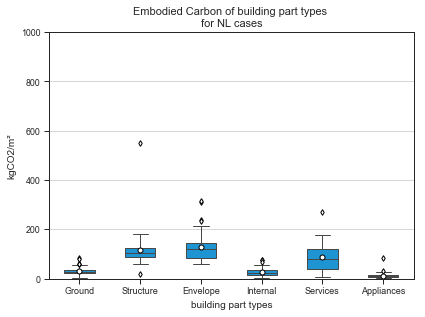

In [154]:
# Harmonize building part data before visualizing the impact

df = df_NL

df['GHG_P1_sum_m2a_harm'] = df['GHG_P1_sum_m2a'] * df['lca_RSP']/50
df['GHG_P2_sum_m2a_harm'] = df['GHG_P2_sum_m2a'] * df['lca_RSP']/50
df['GHG_P34_sum_m2a_harm'] = df['GHG_P34_sum_m2a'] * df['lca_RSP']/50
df['GHG_P4_sum_m2a_harm'] = df['GHG_P4_sum_m2a'] * df['lca_RSP']/50
df['GHG_P56_sum_m2a_harm'] = df['GHG_P56_sum_m2a'] * df['lca_RSP']/50
df['GHG_P78_sum_m2a_harm'] = df['GHG_P78_sum_m2a'] * df['lca_RSP']/50

# Recalculate values over [50 years] RSP, as oposed to 'per year' values.
# Values for building part groups

df['GHG_P1_sum_m2_harm'] = df['GHG_P1_sum_m2a_harm'] * RSP_harm
df['GHG_P2_sum_m2_harm'] = df['GHG_P2_sum_m2a_harm'] * RSP_harm
df['GHG_P34_sum_m2_harm'] = df['GHG_P34_sum_m2a_harm'] * RSP_harm
df['GHG_P4_sum_m2_harm'] = df['GHG_P4_sum_m2a_harm'] * RSP_harm
df['GHG_P56_sum_m2_harm'] = df['GHG_P56_sum_m2a_harm'] * RSP_harm
df['GHG_P78_sum_m2_harm'] = df['GHG_P78_sum_m2a_harm'] * RSP_harm

# Harmonized total across RSP

df2 = df[['GHG_P1_sum_m2_harm','GHG_P2_sum_m2_harm','GHG_P34_sum_m2_harm','GHG_P4_sum_m2_harm','GHG_P56_sum_m2_harm','GHG_P78_sum_m2_harm']].dropna(axis = 0, how = 'all')

df2.rename(columns = {"GHG_P1_sum_m2_harm":"Ground",
                    "GHG_P2_sum_m2_harm":"Structure",
                    "GHG_P34_sum_m2_harm":"Envelope",
                    "GHG_P4_sum_m2_harm":"Internal",
                    "GHG_P56_sum_m2_harm":"Services",
                    "GHG_P78_sum_m2_harm":"Appliances"}, inplace = True)

# set figure size
w = w_2
h = w*f_3
fig, ax = plt.subplots(figsize = (w,h))

# create boxplot
sns.boxplot(data = df2,
            orient = 'v',
            color = sns.color_palette(colors)[0],
            #order=['','','','','','','','',''],
            width=0.5,
            fliersize=4,
            linewidth=1,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"5"},
            flierprops={"markerfacecolor":"white",
                       "markeredgecolor":"black"}
            )

# set plot title
plt.title('Embodied Carbon of building part types \nfor NL cases', fontsize = 11)

# set axis labels
plt.xlabel('building part types', fontsize = 10, labelpad = 5)
plt.ylabel(u'kgCO2/m²', fontsize = 10, labelpad = 5)

# adjust axis
plt.ylim([0,1000])
plt.xticks(rotation=0,fontsize = 9)

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")    

plt.tight_layout()
fig.savefig('01_figures/0_boxplots/ghg_building_part_types_NL_'+timestr+'.png', dpi = 600)
fig.savefig('01_figures/0_boxplots/ghg_building_part_types_NL_'+timestr+'.svg', format = 'svg')
plt.show()

## Appendix

**Visualize the impact of individual building parts for residential cases**

Harmonize building part data before visualizing the impact

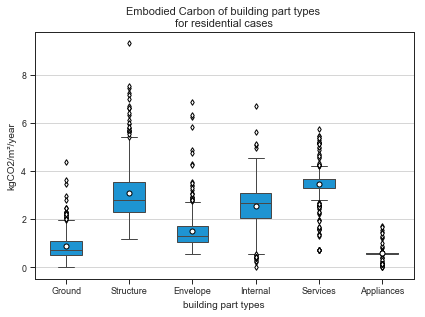

In [155]:
df = df_EUECB[df_EUECB['bldg_use_type'] == 'Residential']

df['GHG_P1_sum_m2a_harm'] = df['GHG_P1_sum_m2a'] * df['lca_RSP']/50
df['GHG_P2_sum_m2a_harm'] = df['GHG_P2_sum_m2a'] * df['lca_RSP']/50
df['GHG_P34_sum_m2a_harm'] = df['GHG_P34_sum_m2a'] * df['lca_RSP']/50
df['GHG_P4_sum_m2a_harm'] = df['GHG_P4_sum_m2a'] * df['lca_RSP']/50
df['GHG_P56_sum_m2a_harm'] = df['GHG_P56_sum_m2a'] * df['lca_RSP']/50
df['GHG_P78_sum_m2a_harm'] = df['GHG_P78_sum_m2a'] * df['lca_RSP']/50

df = df[['GHG_P1_sum_m2a_harm','GHG_P2_sum_m2a_harm','GHG_P34_sum_m2a_harm','GHG_P4_sum_m2a_harm','GHG_P56_sum_m2a_harm','GHG_P78_sum_m2a_harm']].dropna(axis = 0, how = 'any')

df.rename(columns = {"GHG_P1_sum_m2a_harm":"Ground",
                    "GHG_P2_sum_m2a_harm":"Structure",
                    "GHG_P34_sum_m2a_harm":"Envelope",
                    "GHG_P4_sum_m2a_harm":"Internal",
                    "GHG_P56_sum_m2a_harm":"Services",
                    "GHG_P78_sum_m2a_harm":"Appliances"}, inplace = True)

# set figure size
w = w_2
h = w*f_3
fig, ax = plt.subplots(figsize = (w,h))

# create boxplot
sns.boxplot(data = df,
            orient = 'v',
            color = sns.color_palette(colors)[0],
            #order=['','','','','','','','',''],
            width=0.5,
            fliersize=4,
            linewidth=1,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"5"},
            flierprops={"markerfacecolor":"white",
                       "markeredgecolor":"black"}
            )

# set plot title
plt.title('Embodied Carbon of building part types \nfor residential cases', fontsize = 11)

# set axis labels
plt.xlabel('building part types', fontsize = 10, labelpad = 5)
plt.ylabel(u'kgCO2/m²/year', fontsize = 10, labelpad = 5)

# adjust axis
plt.xticks(rotation=0,fontsize = 9)

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")    

plt.tight_layout()
fig.savefig('01_figures/0_boxplots/ghg_building_part_types_residential_'+timestr+'.png', dpi = 600)
fig.savefig('01_figures/0_boxplots/ghg_building_part_types_residential_'+timestr+'.svg', format = 'svg')
plt.show()

**Visualize the impact of individual building parts for residential cases**

Harmonize building part data before visualizing the impact

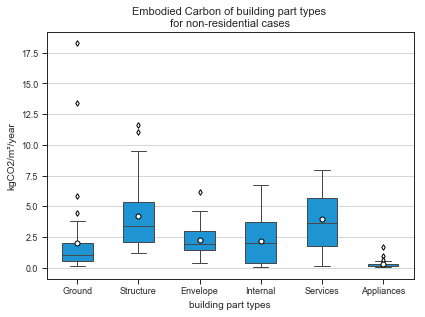

In [156]:
df = df_EUECB[df_EUECB['bldg_use_type'] == 'Non-residential']

df['GHG_P1_sum_m2a_harm'] = df['GHG_P1_sum_m2a'] * df['lca_RSP']/50
df['GHG_P2_sum_m2a_harm'] = df['GHG_P2_sum_m2a'] * df['lca_RSP']/50
df['GHG_P34_sum_m2a_harm'] = df['GHG_P34_sum_m2a'] * df['lca_RSP']/50
df['GHG_P4_sum_m2a_harm'] = df['GHG_P4_sum_m2a'] * df['lca_RSP']/50
df['GHG_P56_sum_m2a_harm'] = df['GHG_P56_sum_m2a'] * df['lca_RSP']/50
df['GHG_P78_sum_m2a_harm'] = df['GHG_P78_sum_m2a'] * df['lca_RSP']/50

df = df[['GHG_P1_sum_m2a_harm','GHG_P2_sum_m2a_harm','GHG_P34_sum_m2a_harm','GHG_P4_sum_m2a_harm','GHG_P56_sum_m2a_harm','GHG_P78_sum_m2a_harm']].dropna(axis = 0, how = 'any')

df.rename(columns = {"GHG_P1_sum_m2a_harm":"Ground",
                    "GHG_P2_sum_m2a_harm":"Structure",
                    "GHG_P34_sum_m2a_harm":"Envelope",
                    "GHG_P4_sum_m2a_harm":"Internal",
                    "GHG_P56_sum_m2a_harm":"Services",
                    "GHG_P78_sum_m2a_harm":"Appliances"}, inplace = True)

# set figure size
w = w_2
h = w*f_3
fig, ax = plt.subplots(figsize = (w,h))

# create boxplot
sns.boxplot(data = df,
            orient = 'v',
            color = sns.color_palette(colors)[0],
            #order=['','','','','','','','',''],
            width=0.5,
            fliersize=4,
            linewidth=1,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"5"},
            flierprops={"markerfacecolor":"white",
                       "markeredgecolor":"black"}
            )

# set plot title
plt.title('Embodied Carbon of building part types \nfor non-residential cases', fontsize = 11)

# set axis labels
plt.xlabel('building part types', fontsize = 10, labelpad = 5)
plt.ylabel(u'kgCO2/m²/year', fontsize = 10, labelpad = 5)

# adjust axis
plt.xticks(rotation=0,fontsize = 9)

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")    

plt.tight_layout()
fig.savefig('01_figures/0_boxplots/ghg_building_part_types_non_residential_'+timestr+'.png', dpi = 600)
fig.savefig('01_figures/0_boxplots/ghg_building_part_types_non_residential_'+timestr+'.svg', format = 'svg')
plt.show()

# Variation for different countries (3.6)

**CO2 by Building use type for each country**

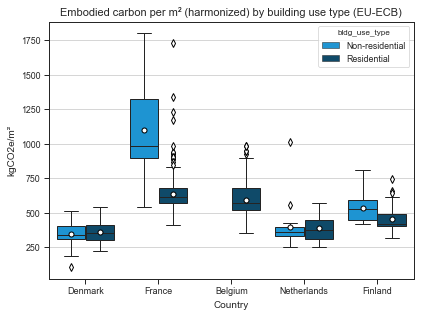

In [157]:
df = df_EUECB

# Boxplot _Y for all countries (_X) in EU-ECB dataset, by buildign type (_hue)
#plt_description = 'by country and building type boxplot'

boxplot_title = 'Embodied carbon per m² (harmonized) by building use type (EU-ECB)'

_X = 'site_country'
_Y = 'GHG_sum_em_m2_harm'

# set figure size
w = w_2
h = w*f_3
fig, ax = plt.subplots(figsize = (w,h))

# create plot
sns.boxplot(data = df,
            x=_X,
            y=_Y,
            hue='bldg_use_type',
            #col='bldg_use_type',
            linewidth=1,
            palette=colors,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"5"},
            flierprops={"markerfacecolor":"white",
                       "markeredgecolor":"black"}
            )

#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Modify plot
#plt_title = ('{} ({}) - {} {}').format(plt_section, _df_name, _Y, plt_description)

plt.title(boxplot_title, fontsize = 11)

# set axis labels
plt.xlabel('Country', fontsize = 10, labelpad = 5)
plt.ylabel('kgCO2e/m²', fontsize = 10, labelpad = 5)

# adjust axis
plt.xticks(rotation=0,fontsize = 9)

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")    

plt.tight_layout()
fig.savefig('01_figures/0_boxplots/Embodied_carbon_per_country_multiplot_'+timestr+'.png', dpi = 600)
fig.savefig('01_figures/0_boxplots/Embodied_carbon_per_country_multiplot_'+timestr+'.svg', format = 'svg')
plt.show()

**CO2 by country for each life cycle module**

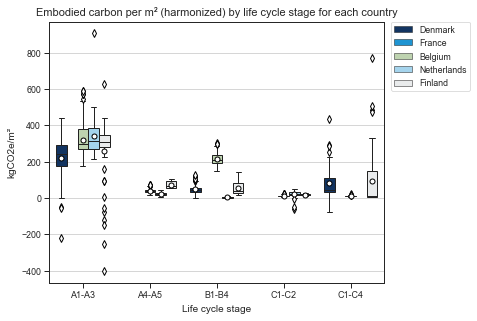

In [158]:
df = df_EUECB

df_A1_A3 = df[['site_country','GHG_A123_m2_harm']]
df_A1_A3['life_cycle_stage'] = 'A1-A3'
df_A1_A3.rename(columns = {"GHG_A123_m2_harm":"GHG"}, inplace = True)

df_A4_A5 = df[['site_country','GHG_A45_m2_harm']]
df_A4_A5['life_cycle_stage'] = 'A4-A5'
df_A4_A5.rename(columns = {"GHG_A45_m2_harm":"GHG"}, inplace = True)

df_B1_B4 = df[['site_country','GHG_B1234_m2_harm']]
df_B1_B4['life_cycle_stage'] = 'B1-B4'
df_B1_B4.rename(columns = {"GHG_B1234_m2_harm":"GHG"}, inplace = True)

df_C1_C2 = df[['site_country','GHG_C12_m2_harm']]
df_C1_C2['life_cycle_stage'] = 'C1-C2'
df_C1_C2.rename(columns = {"GHG_C12_m2_harm":"GHG"}, inplace = True)

df_C3_C4 = df[['site_country','GHG_C34_m2_harm']]
df_C3_C4['life_cycle_stage'] = 'C1-C4'
df_C3_C4.rename(columns = {"GHG_C34_m2_harm":"GHG"}, inplace = True)

df = pd.concat([df_A1_A3,df_A4_A5,df_B1_B4,df_C1_C2,df_C3_C4])

# Boxplot _Y for all countries (_X) in EU-ECB dataset, by buildign type (_hue)
#plt_description = 'by country and building type boxplot'

boxplot_title = 'Embodied carbon per m² (harmonized) by life cycle stage for each country'

_X = 'life_cycle_stage'
_Y = 'GHG'

# set figure size
w = w_2
h = w*f_2
fig, ax = plt.subplots(figsize = (w,h))

# create plot
sns.boxplot(data = df,
            x=_X,
            y=_Y,
            hue='site_country',
            #col='bldg_use_type',
            linewidth=1,
            palette=colors2,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"5"},
            flierprops={"markerfacecolor":"white",
                       "markeredgecolor":"black"}
            )

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Modify plot
#plt_title = ('{} ({}) - {} {}').format(plt_section, _df_name, _Y, plt_description)

plt.title(boxplot_title, fontsize = 11)

# set axis labels
plt.xlabel('Life cycle stage', fontsize = 10, labelpad = 5)
plt.ylabel('kgCO2e/m²', fontsize = 10, labelpad = 5)

# adjust axis
plt.xticks(rotation=0,fontsize = 9)

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")    

#plt.tight_layout()
fig.savefig('01_figures/0_boxplots/Embodied_carbon_life_cycle_stage_country_multiplot_'+timestr+'.png', dpi = 600)
fig.savefig('01_figures/0_boxplots/Embodied_carbon_life_cycle_stage_country_multiplot_'+timestr+'.svg', format = 'svg')
plt.show()

**Comparison to indicatory benchmarks**

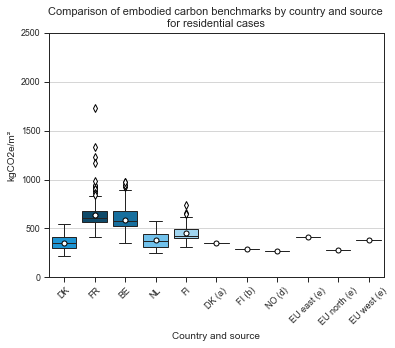

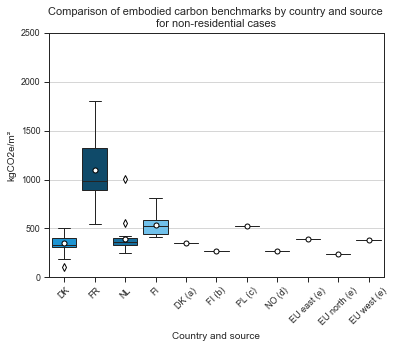

In [159]:
df = df_EUECB

df_1 = df[['site_country_code','bldg_use_type','GHG_sum_em_m2_harm']]
"""
df_1.replace('DK','DK (EU-ECB)',inplace=True)
df_1.replace('FR','FR (EU-ECB)',inplace=True)
df_1.replace('FI','FI (EU-ECB)',inplace=True)
df_1.replace('NL','NL (EU-ECB)',inplace=True)
df_1.replace('BE','BE (EU-ECB)',inplace=True)
"""
data = {'site_country_code': ['DK (a)',
                              #'IT (b)',
                              'FI (b)',
                              'FI (b)',
                              'PL (c)',
                              'NO (d)',
                              'EU east (e)',
                              'EU east (e)',
                              'EU north (e)',
                              'EU north (e)',
                              'EU west (e)',
                              'EU west (e)'],
        'scope': ['A1-3, B4, C3-4',
                              #'A1-5, B4, C2-4',
                              'A1-3, B4',
                              'A1-3, B4',
                              'A1-5, B4, C1-4',
                              'A1-5, B4',
                              'A1-5, B4-5, C1-4',
                              'A1-5, B4-5, C1-4',
                              'A1-5, B4-5, C1-4',
                              'A1-5, B4-5, C1-4',
                              'A1-5, B4-5, C1-4',
                              'A1-5, B4-5, C1-4'],
        'bldg_use_type': ['Mix',
                          #'Residential',
                          'Residential',
                          'Non-residential',
                          'Non-residential',
                          'Mix',
                          'Non-residential',
                          'Residential',
                          'Non-residential',
                          'Residential',
                          'Non-residential',
                          'Residential'],
        'GHG_sum_em_m2_harm': [355,
                               #190,
                               289,
                               274,
                               526,
                               270,
                               393,
                               408,
                               242,
                               275,
                               384,
                               383]}
df_2 = pd.DataFrame(data) 

df_3 = pd.concat([df_1,df_2])

###############################################################################################################

df_4 = df_3[df_3.bldg_use_type != 'Non-residential']

boxplot_title = 'Comparison of embodied carbon benchmarks by country and source \nfor residential cases'

_X = 'site_country_code'
_Y = 'GHG_sum_em_m2_harm'

# set figure size
w = w_2
h = w*f_4
fig, ax = plt.subplots(figsize = (w,h))

# create plot
sns.boxplot(data = df_4,
            x=_X,
            y=_Y,
            #hue='bldg_use_type',
            #col='bldg_use_type',
            linewidth=1,
            palette=colors,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"5"},
            flierprops={"markerfacecolor":"white",
                       "markeredgecolor":"black"}
            )

#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Modify plot
#plt_title = ('{} ({}) - {} {}').format(plt_section, _df_name, _Y, plt_description)

plt.title(boxplot_title, fontsize = 11)

# set axis labels
plt.xlabel('Country and source', fontsize = 10, labelpad = 5)
plt.ylabel('kgCO2e/m²', fontsize = 10, labelpad = 5)

# adjust axis
plt.xticks(rotation=45,fontsize = 9)
plt.yticks([0,500,1000,1500,2000,2500])
plt.ylim([0,2500])

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")    

#plt.tight_layout()
fig.savefig('01_figures/0_boxplots/Embodied_carbon_benchmark_comparison_residential_'+timestr+'.png', dpi = 600, bbox_inches="tight")
fig.savefig('01_figures/0_boxplots/Embodied_carbon_benchmark_comparison_residential_'+timestr+'.svg', format = 'svg', bbox_inches="tight")
plt.show()

###############################################################################################################

df_5 = df_3[df_3.bldg_use_type != 'Residential']

boxplot_title = 'Comparison of embodied carbon benchmarks by country and source \nfor non-residential cases'

_X = 'site_country_code'
_Y = 'GHG_sum_em_m2_harm'

# set figure size
w = w_2
h = w*f_4
fig, ax = plt.subplots(figsize = (w,h))

# create plot
sns.boxplot(data = df_5,
            x=_X,
            y=_Y,
            #hue='bldg_use_type',
            #col='bldg_use_type',
            linewidth=1,
            palette=colors,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"5"},
            flierprops={"markerfacecolor":"white",
                       "markeredgecolor":"black"}
            )

#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Modify plot
#plt_title = ('{} ({}) - {} {}').format(plt_section, _df_name, _Y, plt_description)

plt.title(boxplot_title, fontsize = 11)

# set axis labels
plt.xlabel('Country and source', fontsize = 10, labelpad = 5)
plt.ylabel('kgCO2e/m²', fontsize = 10, labelpad = 5)

# adjust axis
plt.xticks(rotation=45,fontsize = 9)
plt.yticks([0,500,1000,1500,2000,2500])
plt.ylim([0,2500])

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")    

#plt.tight_layout()
fig.savefig('01_figures/0_boxplots/Embodied_carbon_benchmark_comparison_non-residential_'+timestr+'.png', dpi = 600, bbox_inches="tight")
fig.savefig('01_figures/0_boxplots/Embodied_carbon_benchmark_comparison_non-residential_'+timestr+'.svg', format = 'svg', bbox_inches="tight")
plt.show()

# Variation for different scopes (3.7)

**Create Heatmaps**

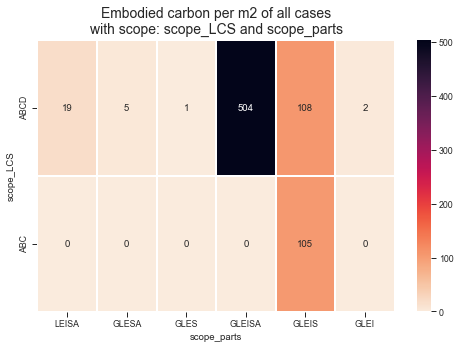

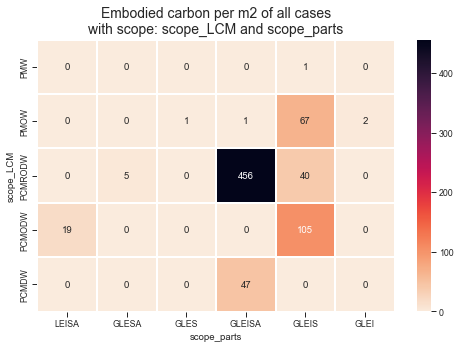

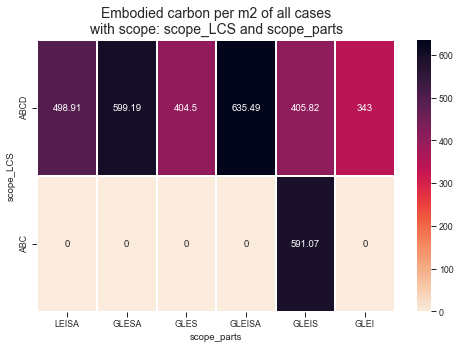

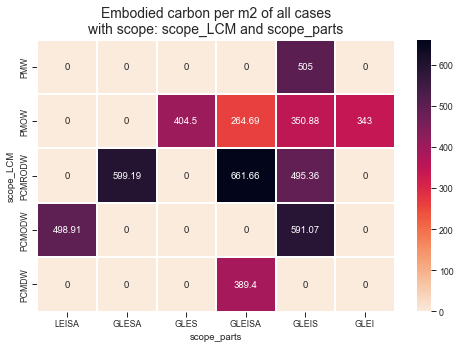

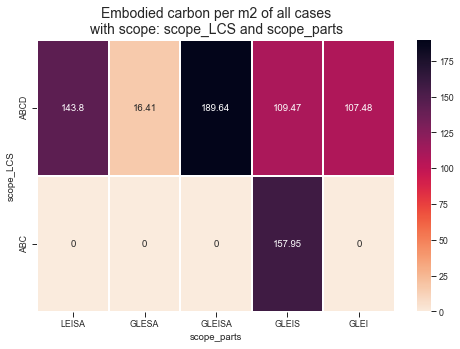

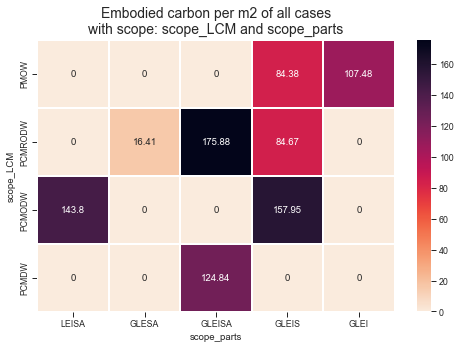

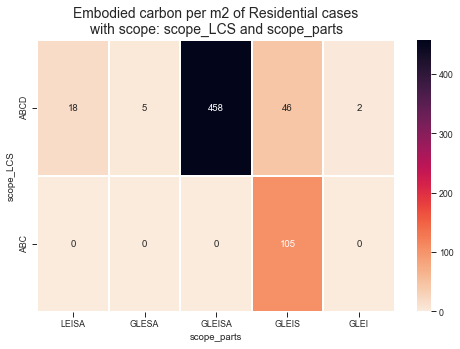

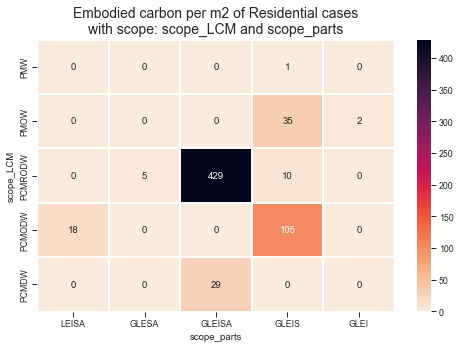

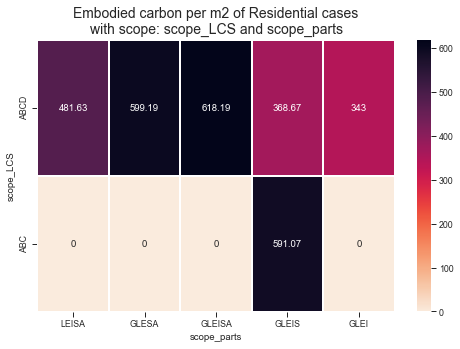

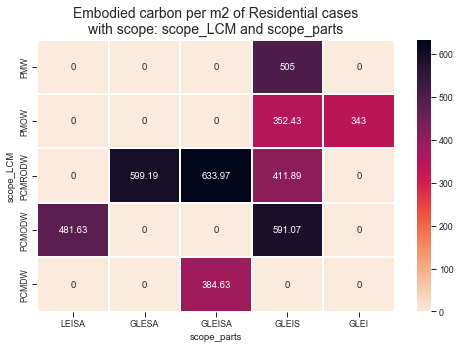

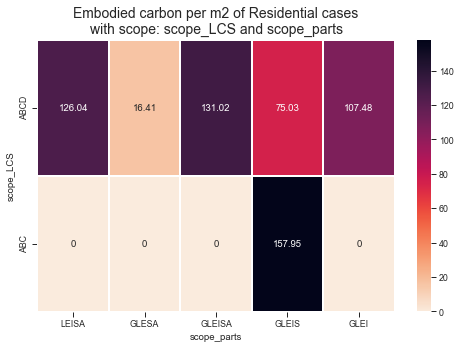

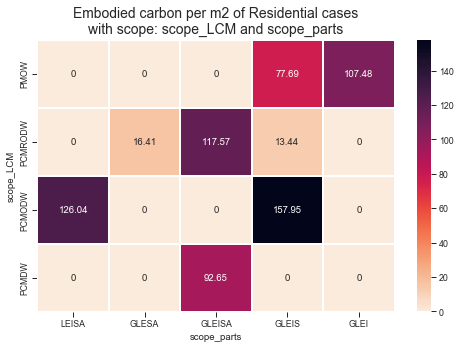

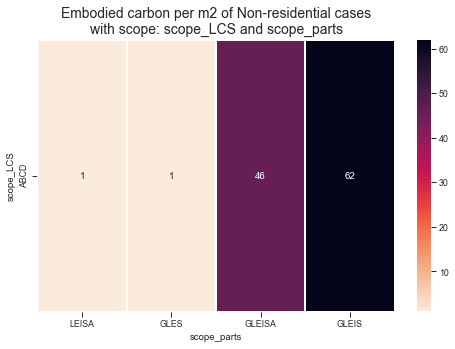

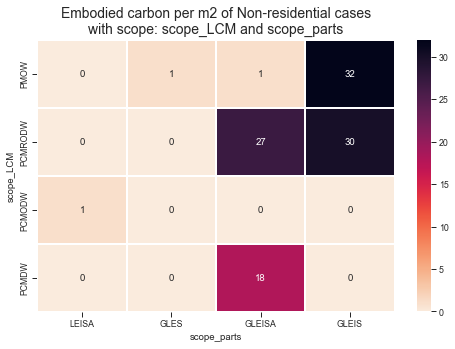

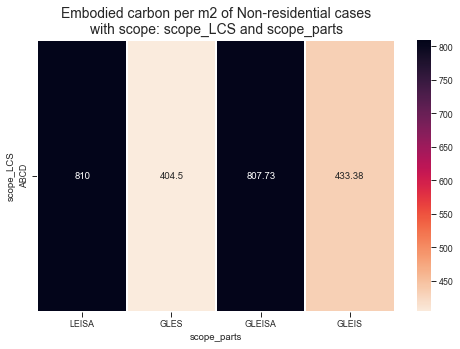

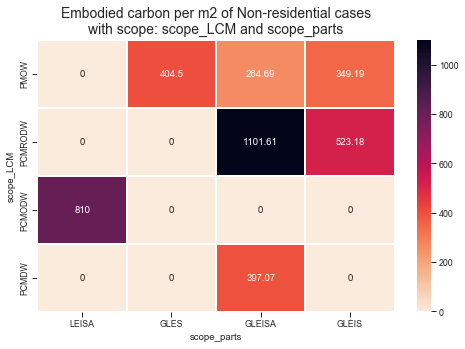

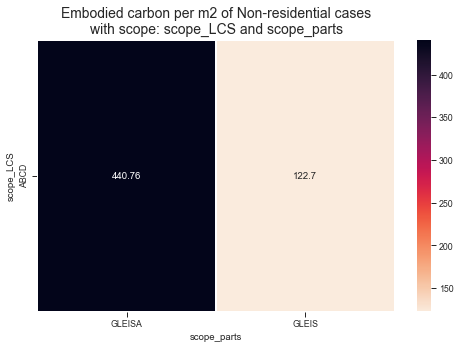

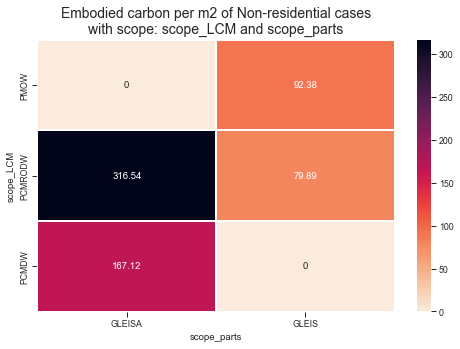

In [160]:
df_list = [df_EUECB,
           df_EUECB[df_EUECB['bldg_use_type'] == 'Residential'],
           df_EUECB[df_EUECB['bldg_use_type'] == 'Non-residential']]

title_list = ['all','Residential','Non-residential']

func_list = ['count','mean','std']

for i in range(0,len(df_list)):
    for FUNC in func_list:

        df = df_list[i]
        title = title_list[i]
        func = FUNC
        
        ### LCS vs parts ###
        
        idx = 'scope_LCS'
        col = 'scope_parts'
        val = 'GHG_sum_em_m2_harm'

        #scope LCS and scope parts
        cross = pd.crosstab(index = df[idx],
                            columns = df[col],
                            values=df[val],
                            aggfunc=func).round(2).fillna(0)

        cross.sort_values(by=idx, axis=0, ascending=False, inplace=True)
        cross.sort_values(by=col, axis=1, ascending=False, inplace=True)

        #cross = cross[['GLEISA','GLESA','GLEIS','GLES','GLEI']]
        #cross = cross[['GLEI','GLES','GLEIS','GLESA','GLEISA']]
        
        fig, ax = plot_heatmap(cross)
        plt.title('Embodied carbon per m2 of '+title+' cases\nwith scope: '+idx+' and '+col, fontsize = 14)
        fig.savefig('01_figures/1_heatmaps/'+title+'_'+func+'_'+val+'_'+idx+'_vs_'+col+'.png', dpi = 600)

        ### LCM vs parts ###
        
        idx = 'scope_LCM'
        col = 'scope_parts'
        val = 'GHG_sum_em_m2_harm'

        #scope LCS and scope parts
        cross = pd.crosstab(index = df[idx],
                            columns = df[col],
                            values=df[val],
                            aggfunc=func).round(2).fillna(0)

        cross.sort_values(by=idx, axis=0, ascending=False, inplace=True)
        cross.sort_values(by=col, axis=1, ascending=False, inplace=True)

        #cross = cross[['PMW','PCMDW','PMOW','PCMODW','PCMRODW']]
        #cross = cross[['GLEI','GLES','GLEIS','GLESA','GLEISA']]
        
        fig, ax = plot_heatmap(cross)
        plt.title('Embodied carbon per m2 of '+title+' cases\nwith scope: '+idx+' and '+col, fontsize = 14)
        fig.savefig('01_figures/1_heatmaps/'+title+'_'+func+'_'+val+'_'+idx+'_vs_'+col+'.png', dpi = 600)

**Create scope analysis v2 (remove building part scope definitions that include R and O)**

In [161]:
df_temp = df_EUECB
df_temp.scope_LCM.replace('PCMRODW','PCMDW',inplace=True)
df_temp.scope_LCM.replace('PCMODW','PCMDW',inplace=True)
df_temp.scope_LCM.replace('PMOW','PMW',inplace=True)

pivot = pd.pivot_table(df_temp, values= ['GHG_sum_em_m2_harm'],
                       index= ['scope_parts'],
                       columns = ['bldg_use_type','scope_LCM'],
                       aggfunc = ['mean','median','std'])

#pivot = pivot.transpose().swaplevel().transpose().sort_index(axis=1)
#pivot = pivot.swaplevel('new_group',0, axis=1)#.sort_index(axis=1)
pivot

mean                                      \
              GHG_sum_em_m2_harm                                       
bldg_use_type    Non-residential             Residential               
scope_LCM                  PCMDW         PMW       PCMDW         PMW   
GLEI                         NaN         NaN         NaN  343.000000   
GLEIS                 523.179210  349.190042  575.490618  356.666874   
GLEISA                819.796506  264.693026  618.186531         NaN   
GLES                         NaN  404.500000         NaN         NaN   
GLESA                        NaN         NaN  599.193469         NaN   
LEISA                 810.000000         NaN  481.625039         NaN   

                          median                                  \
              GHG_sum_em_m2_harm                                   
bldg_use_type    Non-residential             Residential           
scope_LCM                  PCMDW         PMW       PCMDW     PMW   
GLEI                         NaN         NaN         NaN  343.00   
GLEIS                 521.000000  335.250000  565.137187  352.25   
GLEISA                882.608278  264.693026  607.458985     NaN   
GLES                         NaN  404.500000         NaN     NaN   
GLESA                        NaN         NaN  594.780394     NaN   
LEISA                 810.000000         NaN  455.000000     NaN   

                             std                                     
              GHG_sum_em_m2_harm                                     
bldg_use_type    Non-residential            Residential              
scope_LCM                  PCMDW        PMW       PCMDW         PMW  
GLEI                         NaN        NaN         NaN  107.480231  
GLEIS                  79.885497  92.382407  159.199575   80.684827  
GLEISA                437.990466        NaN  131.018715         NaN  
GLES                         NaN        NaN         NaN         NaN  
GLESA                        NaN        NaN   16.413220         NaN  
LEISA                        NaN        NaN  126.038252         NaN

# Indicative reduction targets (3.8)

*See separate file with 08_IndicativeReductionTargets[...].ipynb*

# APPENDIX

## Create boxpot of ratios

**Create boxplot of ratios of EU_ECB cases that have disaggregated results [residential + non-residential]**

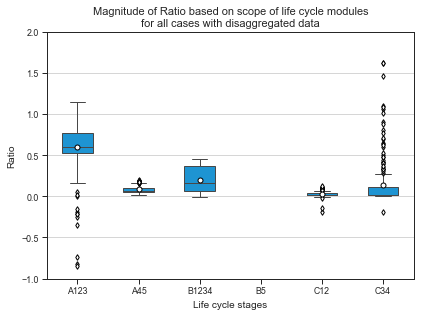

In [162]:
df = df_EUECB[df_EUECB.site_country_code != 'FR']

df_LCM = df[['ratio_A123_LCM',
            'ratio_A45_LCM',
            'ratio_B1234_LCM',
            'ratio_B5_LCM',
            'ratio_C12_LCM',
            'ratio_C34_LCM']]

df_parts = df[['ratio_A123_parts',
        'ratio_A45_parts',
        'ratio_B1234_parts',
        'ratio_B5_parts',
        'ratio_C12_parts',
        'ratio_C34_parts']]

df_LCM.rename(columns = {'ratio_A123_LCM':"A123",
                    'ratio_A45_LCM':"A45",
                    'ratio_B1234_LCM':"B1234",
                    'ratio_B5_LCM':"B5",
                    'ratio_C12_LCM':"C12",
                    'ratio_C34_LCM':"C34"}, inplace = True)

df_parts.rename(columns = {'ratio_A123_parts':"A123",
                    'ratio_A45_parts':"A45",
                    'ratio_B1234_parts':"B1234",
                    'ratio_B5_parts':"B5",
                    'ratio_C12_parts':"C12",
                    'ratio_C34_parts':"C34"}, inplace = True)

# set figure size
w = w_2
h = w*f_3
fig, ax = plt.subplots(figsize = (w,h))

# create boxplot
sns.boxplot(data = df_LCM,
            orient = 'v',
            color = sns.color_palette(colors)[0],
            #order=['','','','','','','','',''],
            width=0.5,
            fliersize=4,
            linewidth=1,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"5"},
            flierprops={"markerfacecolor":"white",
                       "markeredgecolor":"black"}
            )

# set plot title
plt.title('Magnitude of Ratio based on scope of life cycle modules\nfor all cases with disaggregated data', fontsize = 11)

# set axis labels
plt.xlabel('Life cycle stages', fontsize = 10, labelpad = 5)
plt.ylabel('Ratio', fontsize = 10, labelpad = 5)

plt.ylim([-1,2])

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")    

plt.tight_layout()
fig.savefig('01_figures/0_boxplots/ratio_embodied_carbon_life_cycle_stages_residential_non-residential_'+timestr+'.png', dpi = 600)
fig.savefig('01_figures/0_boxplots/ratio_embodied_carbon_life_cycle_stages_residential_non-residential_'+timestr+'.svg', format = 'svg')
plt.show()

**Create boxplot of ratios of EU_ECB cases that have disaggregated results [residential]**

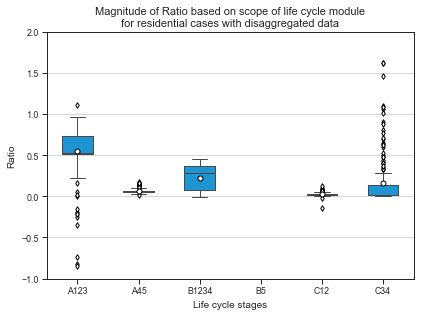

In [163]:
df = df_EUECB[df_EUECB.site_country_code != 'FR']

df = df[df['bldg_use_type'] == 'Residential']

df_LCM = df[['ratio_A123_LCM',
            'ratio_A45_LCM',
            'ratio_B1234_LCM',
            'ratio_B5_LCM',
            'ratio_C12_LCM',
            'ratio_C34_LCM']]

df_parts = df[['ratio_A123_parts',
        'ratio_A45_parts',
        'ratio_B1234_parts',
        'ratio_B5_parts',
        'ratio_C12_parts',
        'ratio_C34_parts']]

df_LCM.rename(columns = {'ratio_A123_LCM':"A123",
                    'ratio_A45_LCM':"A45",
                    'ratio_B1234_LCM':"B1234",
                    'ratio_B5_LCM':"B5",
                    'ratio_C12_LCM':"C12",
                    'ratio_C34_LCM':"C34"}, inplace = True)

df_parts.rename(columns = {'ratio_A123_parts':"A123",
                    'ratio_A45_parts':"A45",
                    'ratio_B1234_parts':"B1234",
                    'ratio_B5_parts':"B5",
                    'ratio_C12_parts':"C12",
                    'ratio_C34_parts':"C34"}, inplace = True)

# set figure size
w = w_2
h = w*f_3
fig, ax = plt.subplots(figsize = (w,h))

# create boxplot
sns.boxplot(data = df_LCM,
            orient = 'v',
            color = sns.color_palette(colors)[0],
            #order=['','','','','','','','',''],
            width=0.5,
            fliersize=4,
            linewidth=1,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"5"},
            flierprops={"markerfacecolor":"white",
                       "markeredgecolor":"black"}
            )

# set plot title
plt.title('Magnitude of Ratio based on scope of life cycle module\nfor residential cases with disaggregated data', fontsize = 11)

# set axis labels
plt.xlabel('Life cycle stages', fontsize = 10, labelpad = 5)
plt.ylabel('Ratio', fontsize = 10, labelpad = 5)

plt.ylim([-1,2])

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")    

plt.tight_layout()
fig.savefig('01_figures/0_boxplots/ratio_embodied_carbon_life_cycle_stages_residential_'+timestr+'.png', dpi = 600)
fig.savefig('01_figures/0_boxplots/ratio_embodied_carbon_life_cycle_stages_residential_'+timestr+'.svg', format = 'svg')
plt.show()

**Create boxplot of ratios of EU_ECB cases that have disaggregated results [non-residential]**

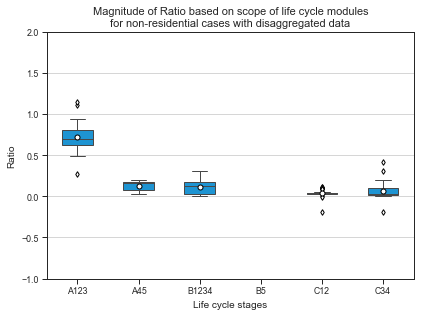

In [164]:
df = df_EUECB[df_EUECB.site_country_code != 'FR']

df = df[df['bldg_use_type'] == 'Non-residential']

df_LCM = df[['ratio_A123_LCM',
            'ratio_A45_LCM',
            'ratio_B1234_LCM',
            'ratio_B5_LCM',
            'ratio_C12_LCM',
            'ratio_C34_LCM']]

df_parts = df[['ratio_A123_parts',
        'ratio_A45_parts',
        'ratio_B1234_parts',
        'ratio_B5_parts',
        'ratio_C12_parts',
        'ratio_C34_parts']]

df_LCM.rename(columns = {'ratio_A123_LCM':"A123",
                    'ratio_A45_LCM':"A45",
                    'ratio_B1234_LCM':"B1234",
                    'ratio_B5_LCM':"B5",
                    'ratio_C12_LCM':"C12",
                    'ratio_C34_LCM':"C34"}, inplace = True)

df_parts.rename(columns = {'ratio_A123_parts':"A123",
                    'ratio_A45_parts':"A45",
                    'ratio_B1234_parts':"B1234",
                    'ratio_B5_parts':"B5",
                    'ratio_C12_parts':"C12",
                    'ratio_C34_parts':"C34"}, inplace = True)

# set figure size
w = w_2
h = w*f_3
fig, ax = plt.subplots(figsize = (w,h))

# create boxplot
sns.boxplot(data = df_LCM,
            orient = 'v',
            color = sns.color_palette(colors)[0],
            #order=['','','','','','','','',''],
            width=0.5,
            fliersize=4,
            linewidth=1,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"5"},
            flierprops={"markerfacecolor":"white",
                       "markeredgecolor":"black"}
            )

# set plot title
plt.title('Magnitude of Ratio based on scope of life cycle modules\nfor non-residential cases with disaggregated data', fontsize = 11)

# set axis labels
plt.xlabel('Life cycle stages', fontsize = 10, labelpad = 5)
plt.ylabel('Ratio', fontsize = 10, labelpad = 5)

plt.ylim([-1,2])

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")    

plt.tight_layout()
fig.savefig('01_figures/0_boxplots/ratio_embodied_carbon_life_cycle_stages_non-residential_'+timestr+'.png', dpi = 600)
fig.savefig('01_figures/0_boxplots/ratio_embodied_carbon_life_cycle_stages_non-residential_'+timestr+'.svg', format = 'svg')
plt.show()

**Create boxplot of ratios for CSTB cases which have been disaggregated based on a calculated ratio**

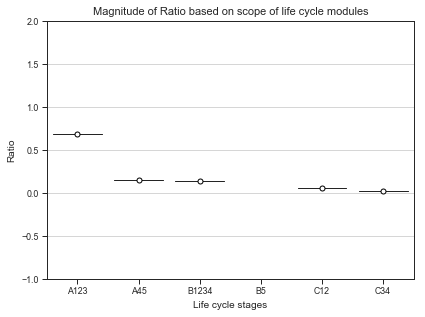

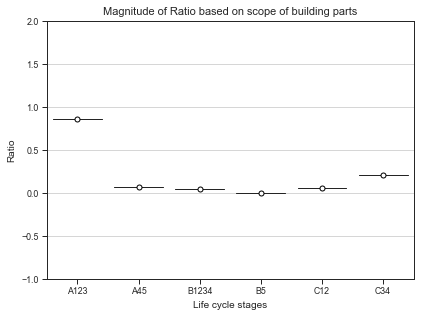

In [165]:
df = df_EUECB[df_EUECB.site_country_code == 'FR']

df_LCM = df[['ratio_A123_LCM',
            'ratio_A45_LCM',
            'ratio_B1234_LCM',
            'ratio_B5_LCM',
            'ratio_C12_LCM',
            'ratio_C34_LCM']]

df_parts = df[['ratio_A123_parts',
        'ratio_A45_parts',
        'ratio_B1234_parts',
        'ratio_B5_parts',
        'ratio_C12_parts',
        'ratio_C34_parts']]

df_LCM.rename(columns = {'ratio_A123_LCM':"A123",
                    'ratio_A45_LCM':"A45",
                    'ratio_B1234_LCM':"B1234",
                    'ratio_B5_LCM':"B5",
                    'ratio_C12_LCM':"C12",
                    'ratio_C34_LCM':"C34"}, inplace = True)

df_parts.rename(columns = {'ratio_A123_parts':"A123",
                    'ratio_A45_parts':"A45",
                    'ratio_B1234_parts':"B1234",
                    'ratio_B5_parts':"B5",
                    'ratio_C12_parts':"C12",
                    'ratio_C34_parts':"C34"}, inplace = True)

####### Ratio based on life cycle modules scope ########

# set figure size
w = w_2
h = w*f_3
fig, ax = plt.subplots(figsize = (w,h))

# create boxplot
sns.boxplot(data = df_LCM,
            width=0.8,
            fliersize=5,
            linewidth=1,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"5"},
            flierprops={"markerfacecolor":"white",
                       "markeredgecolor":"black"}
            )

# set plot title
plt.title('Magnitude of Ratio based on scope of life cycle modules', fontsize = 11)

# set axis labels
plt.xlabel('Life cycle stages', fontsize = 10, labelpad = 5)
plt.ylabel('Ratio', fontsize = 10, labelpad = 5)

plt.ylim([-1,2])

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")    

plt.tight_layout()
fig.savefig('01_figures/0_boxplots/calculated_ratio_embodied_carbon_life_cycle_stages_'+timestr+'.png', dpi = 600)
fig.savefig('01_figures/0_boxplots/calculated_ratio_embodied_carbon_life_cycle_stages_'+timestr+'.svg', format = 'svg')
plt.show()

####### Ratio based on building parts scope ########

# set figure size
w = w_2
h = w*f_3
fig, ax = plt.subplots(figsize = (w,h))

# create boxplot
sns.boxplot(data = df_parts,
            width=0.8,
            fliersize=5,
            linewidth=1,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"5"},
            flierprops={"markerfacecolor":"white",
                       "markeredgecolor":"black"}
            )

# set plot title
plt.title('Magnitude of Ratio based on scope of building parts', fontsize = 11)

# set axis labels
plt.xlabel('Life cycle stages', fontsize = 10, labelpad = 5)
plt.ylabel('Ratio', fontsize = 10, labelpad = 5)

plt.ylim([-1,2])

timestr = time.strftime("%Y-%m-%d_%H-%M-%S")    

plt.tight_layout()
fig.savefig('01_figures/0_boxplots/calculated_ratio_embodied_carbon_building_parts_'+timestr+'.png', dpi = 600)
fig.savefig('01_figures/0_boxplots/calculated_ratio_embodied_carbon_building_parts_'+timestr+'.svg', format = 'svg')
plt.show()

In [166]:
print("Figures generated.")

Figures generated.
